In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
Data1=pd.read_csv('magicbricks_pune_rent.csv')
Data1.head()
Data1.columns

Index(['Unnamed: 0', 'Rooms', 'Furnishing', 'Bathroom', 'Tenant Preferred',
       'Availability', 'Carpet Area', 'Floor', 'Price'],
      dtype='object')

In [3]:
Data1.head()

,Unnamed: 0,Rooms,Furnishing,Bathroom,Tenant Preferred,Availability,Carpet Area,Floor,Price
0,0,"1 BHK Flat for Rent in Wagholi, Pune",FurnishingFurnished,Bathroom1,NaN,AvailabilityImmediately,Carpet Area584 sqft,Floor4 out of 10,"₹18,000"
1,1,"2 BHK Flat for Rent in Manjri, Manjri Budruk, ...",FurnishingFurnished,Bathroom2,NaN,AvailabilityImmediately,NaN,Floor6 out of 12,"₹20,000"
2,2,2 BHK Flat for Rent in Adarsh Colony Tingre Na...,FurnishingFurnished,Bathroom2,NaN,AvailabilityFrom Apr '25,Carpet Area900 sqft,Floor5 out of 5,"₹30,000"
3,3,"2 BHK Flat for Rent in Wagholi, Pune",FurnishingUnfurnished,Bathroom2,NaN,AvailabilityImmediately,Carpet Area800 sqft,Floor5 out of 7,"₹28,000"
4,4,"2 BHK Flat for Rent in Aundh, Pune",FurnishingFurnished,Bathroom1,NaN,AvailabilityImmediately,NaN,Floor1 out of 3,"₹25,000"


In [4]:
# Price
def convert_lacs_to_thousands(value):
    value = value.replace('₹', '').replace(',','').strip()
    if 'Lac' in value:  
        num = float(value.replace('Lac','').strip())  
        return f'{num * 100000}'  
    return value

Data1['Price'] = Data1['Price'].apply(convert_lacs_to_thousands)
Data1['Price'] = pd.to_numeric(Data1['Price'], errors='coerce')
Data1['Price'].fillna(0, inplace=True)
Data1['Price'] = Data1['Price'].round().astype(int)
Data1['Price'] = Data1['Price'].astype(int)


In [5]:
# Location
Data1['Location'] = Data1['Rooms'].replace('\d.BHK.Flat.for.Rent.in.','',regex= True)
Data1['Location'] = Data1['Location'].replace('Pune','',regex= True)
Data1['Location'] = Data1['Location'].astype(object)

# Rooms
regex = r"\d"
Data1["Rooms"] = Data1["Rooms"].apply(lambda x: re.findall(regex, str(x))[0] if isinstance(x, str) and re.findall(regex, str(x)) else np.nan)
Data1['Rooms'] = pd.to_numeric(Data1['Rooms'], errors='coerce')
Data1['Rooms'] = Data1['Rooms'].fillna(0).astype(int)  

# Furnishing
Data1['Furnishing'] = Data1['Furnishing'].replace('Furnishing','',regex= True)
Data1['Furnishing'] = Data1['Furnishing'].astype(object)

# Bathroom
Data1['Bathroom'] = Data1['Bathroom'].replace('Bathroom','',regex= True)
Data1['Bathroom'] = pd.to_numeric(Data1['Bathroom'], errors='coerce')
Data1['Bathroom'] = Data1['Bathroom'].fillna(0).astype(int)

# Availability
Data1['Availability'] = Data1['Availability'].replace('Availability','',regex= True)
Data1['Availability'] = Data1['Availability'].astype(object)

# Carpet Area
Data1['Carpet Area'] = Data1['Carpet Area'].replace('Carpet Area','',regex= True)
Data1['Carpet Area'] = Data1['Carpet Area'].replace('sqft','',regex=True)
Data1['Carpet Area'] = pd.to_numeric(Data1['Carpet Area'], errors='coerce')
Data1['Carpet Area'] = Data1['Carpet Area'].astype(float)

# Floor
Data1['Floor'] = Data1['Floor'].replace('Floor','',regex= True)
Data1['Floor'] = Data1['Floor'].replace('out of \d+','',regex= True)
Data1['Floor'] = pd.to_numeric(Data1['Floor'], errors='coerce')
Data1['Floor'] = Data1['Floor'].fillna(0).astype(int)

# Price
Data1['Price'] = Data1['Price'].replace('[^\d]','', regex=True)
Data1['Price'] = pd.to_numeric(Data1['Price'], errors='coerce')
Data1['Price'] = Data1['Price'].astype(float)

# Check the data types after the conversions
print(Data1.dtypes)


Unnamed: 0            int64
Rooms                 int32
Furnishing           object
Bathroom              int32
Tenant Preferred    float64
Availability         object
Carpet Area         float64
Floor                 int32
Price               float64
Location             object
dtype: object


In [6]:
#drop unwanted column
Data1= Data1.drop(columns=['Unnamed: 0','Tenant Preferred'], axis = 1)
Data1[:50]

,Rooms,Furnishing,Bathroom,Availability,Carpet Area,Floor,Price,Location
0,1,Furnished,1,Immediately,584.0,4,18000.0,"Wagholi,"
1,2,Furnished,2,Immediately,NaN,6,20000.0,"Manjri, Manjri Budruk,"
2,2,Furnished,2,From Apr '25,900.0,5,30000.0,"Adarsh Colony Tingre Nagar,"
3,2,Unfurnished,2,Immediately,800.0,5,28000.0,"Wagholi,"
4,2,Furnished,1,Immediately,NaN,1,25000.0,"Aundh,"
5,2,Semi-Furnished,2,Immediately,NaN,6,25000.0,"Wakad,"
6,3,Furnished,3,Immediately,1100.0,4,230000.0,"Prabhat Road,"
7,1,Furnished,1,Immediately,550.0,2,10000.0,"Model Colony, Shivaji Nagar,"
8,1,Unfurnished,1,From Mar '25,NaN,1,15000.0,
9,4,Unfurnished,4,Immediately,1825.0,3,160000.0,"Prabhat Road,"


In [7]:
Data1.shape 

(450, 8)

In [8]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         450 non-null    int32  
 1   Furnishing    449 non-null    object 
 2   Bathroom      450 non-null    int32  
 3   Availability  450 non-null    object 
 4   Carpet Area   335 non-null    float64
 5   Floor         450 non-null    int32  
 6   Price         450 non-null    float64
 7   Location      450 non-null    object 
dtypes: float64(2), int32(3), object(3)
memory usage: 23.0+ KB


In [9]:
Data1.isnull().sum()

Rooms             0
Furnishing        1
Bathroom          0
Availability      0
Carpet Area     115
Floor             0
Price             0
Location          0
dtype: int64

In [10]:
## remove and replace
Data1 = Data1.dropna(subset=['Furnishing'])
Data1['Carpet Area'] = Data1['Carpet Area'].fillna(Data1['Carpet Area'].median())

In [11]:
Data1.isnull().sum()

Rooms           0
Furnishing      0
Bathroom        0
Availability    0
Carpet Area     0
Floor           0
Price           0
Location        0
dtype: int64

In [12]:
Data1.to_csv("magicbricks2.csv")

In [13]:
df=pd.read_csv("magicbricks2.csv")

In [14]:
df.head()

,Unnamed: 0,Rooms,Furnishing,Bathroom,Availability,Carpet Area,Floor,Price,Location
0,0,1,Furnished,1,Immediately,584.0,4,18000.0,"Wagholi,"
1,1,2,Furnished,2,Immediately,825.0,6,20000.0,"Manjri, Manjri Budruk,"
2,2,2,Furnished,2,From Apr '25,900.0,5,30000.0,"Adarsh Colony Tingre Nagar,"
3,3,2,Unfurnished,2,Immediately,800.0,5,28000.0,"Wagholi,"
4,4,2,Furnished,1,Immediately,825.0,1,25000.0,"Aundh,"


In [15]:
#Description of data
Data1.describe()

,Rooms,Bathroom,Carpet Area,Floor,Price
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,2.040089,2.084633,928.619154,5.946548,35430.405345
std,0.844201,0.867035,471.330478,4.413534,36604.684893
min,0.000000,1.000000,195.000000,0.000000,0.000000
25%,1.000000,2.000000,750.000000,3.000000,20000.000000
50%,2.000000,2.000000,825.000000,5.000000,27000.000000
75%,3.000000,2.000000,950.000000,8.000000,39500.000000
max,4.000000,6.000000,3800.000000,32.000000,410000.000000


In [16]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 449
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         449 non-null    int32  
 1   Furnishing    449 non-null    object 
 2   Bathroom      449 non-null    int32  
 3   Availability  449 non-null    object 
 4   Carpet Area   449 non-null    float64
 5   Floor         449 non-null    int32  
 6   Price         449 non-null    float64
 7   Location      449 non-null    object 
dtypes: float64(2), int32(3), object(3)
memory usage: 26.3+ KB


In [17]:
##########  EDA   ###########


In [18]:
#split into numerical and categorical 
numerical_columns= Data1.select_dtypes(include= ['int32','float64']).columns.tolist()
categorical_columns= Data1.select_dtypes(include= ['object']).columns.tolist()

print(numerical_columns)
print(categorical_columns)

['Rooms', 'Bathroom', 'Carpet Area', 'Floor', 'Price']
['Furnishing', 'Availability', 'Location']


In [19]:
print(numerical_columns)
print('-'*50)
print(categorical_columns)

['Rooms', 'Bathroom', 'Carpet Area', 'Floor', 'Price']
--------------------------------------------------
['Furnishing', 'Availability', 'Location']


In [20]:
#### Distribution of Data ######

Rooms             Axes(0.125,0.786098;0.168478x0.0939024)
Bathroom       Axes(0.327174,0.786098;0.168478x0.0939024)
Carpet Area    Axes(0.529348,0.786098;0.168478x0.0939024)
Floor          Axes(0.731522,0.786098;0.168478x0.0939024)
Price             Axes(0.125,0.673415;0.168478x0.0939024)
dtype: object

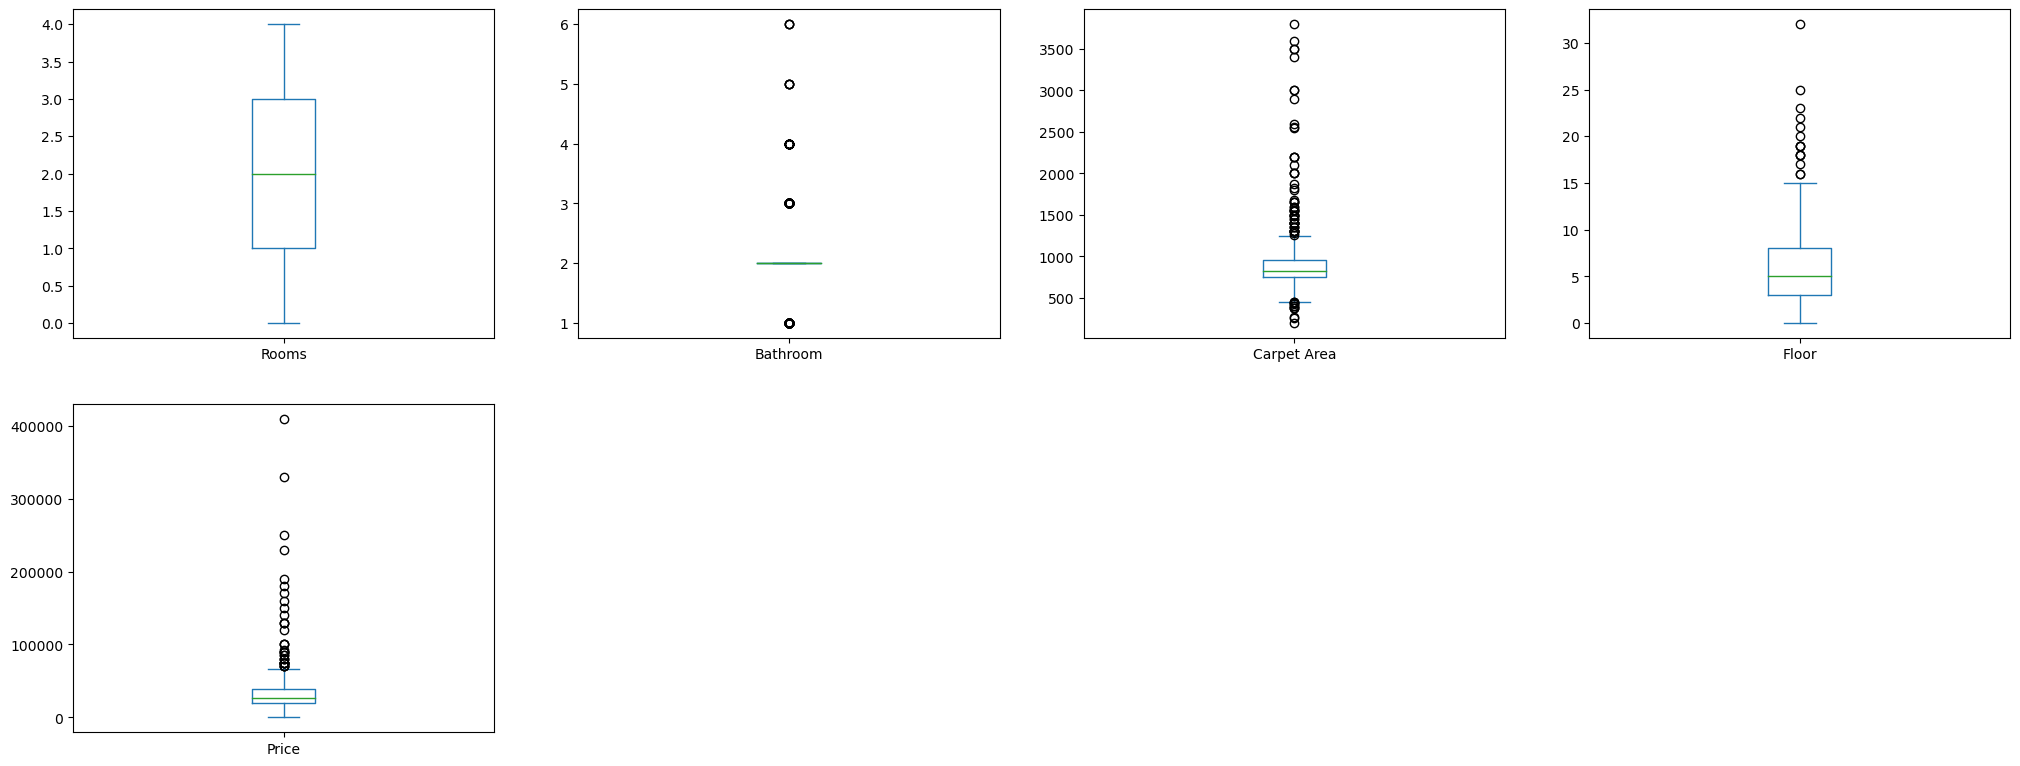

In [21]:
# Box plot
Data1[numerical_columns].plot(kind= 'box',
                            subplots= True,
                            figsize=(25,35),
                            layout= (7,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

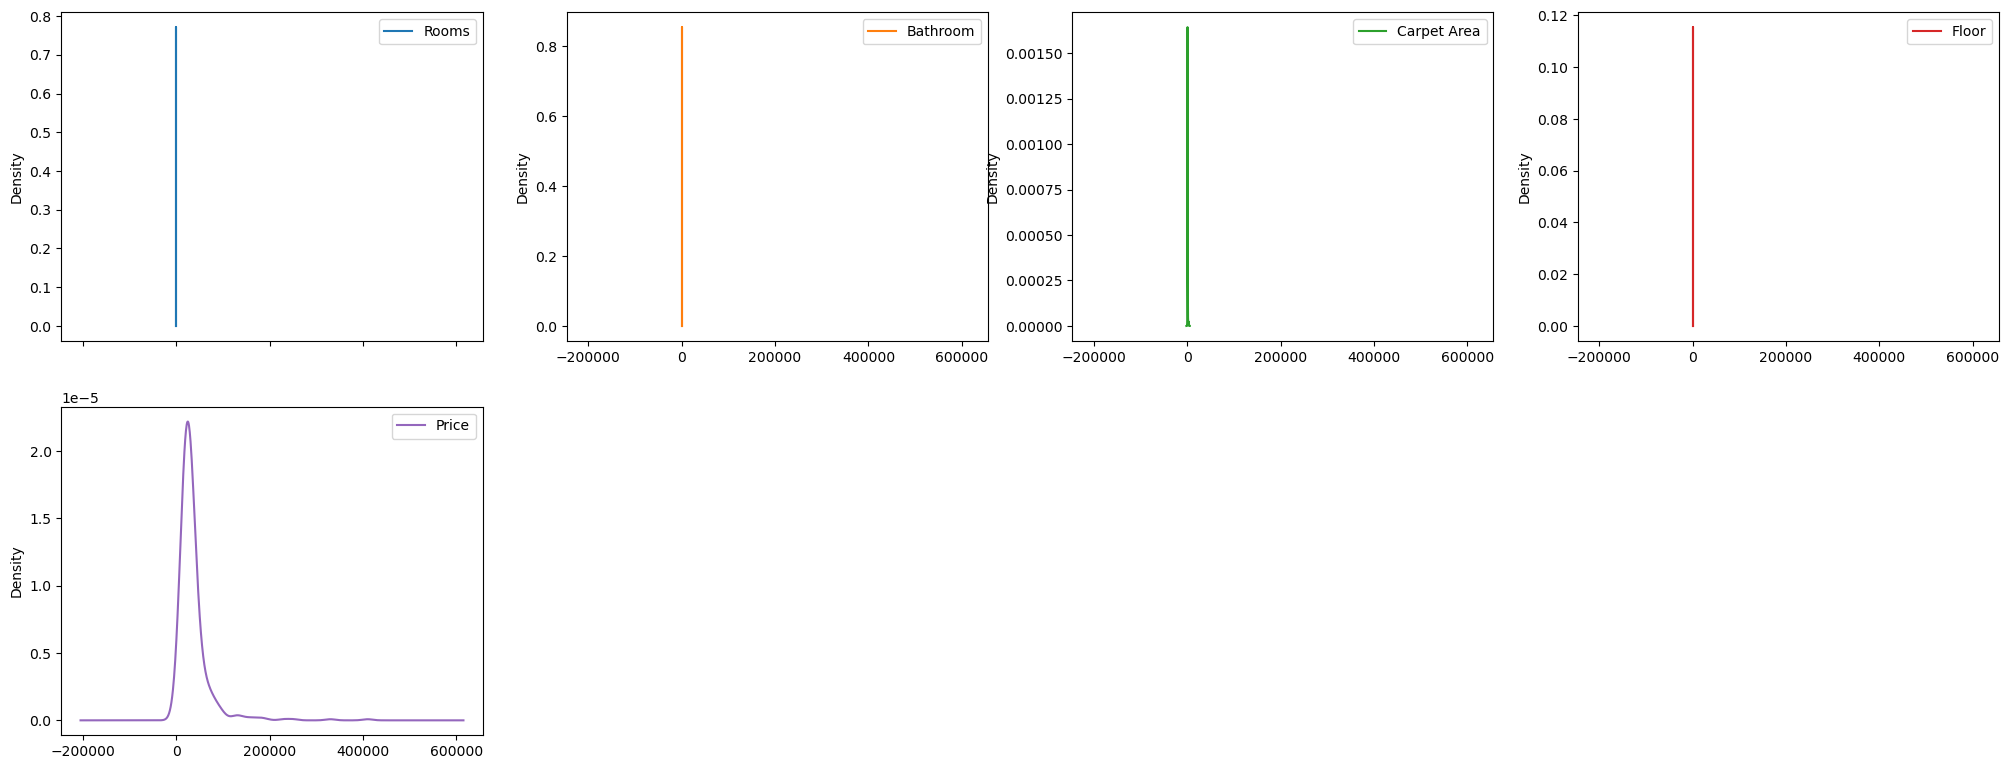

In [22]:
#Kde plot
Data1[numerical_columns].plot(kind='kde',
                             subplots=True,
                             figsize=(25,35),
                             layout=(7,4))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

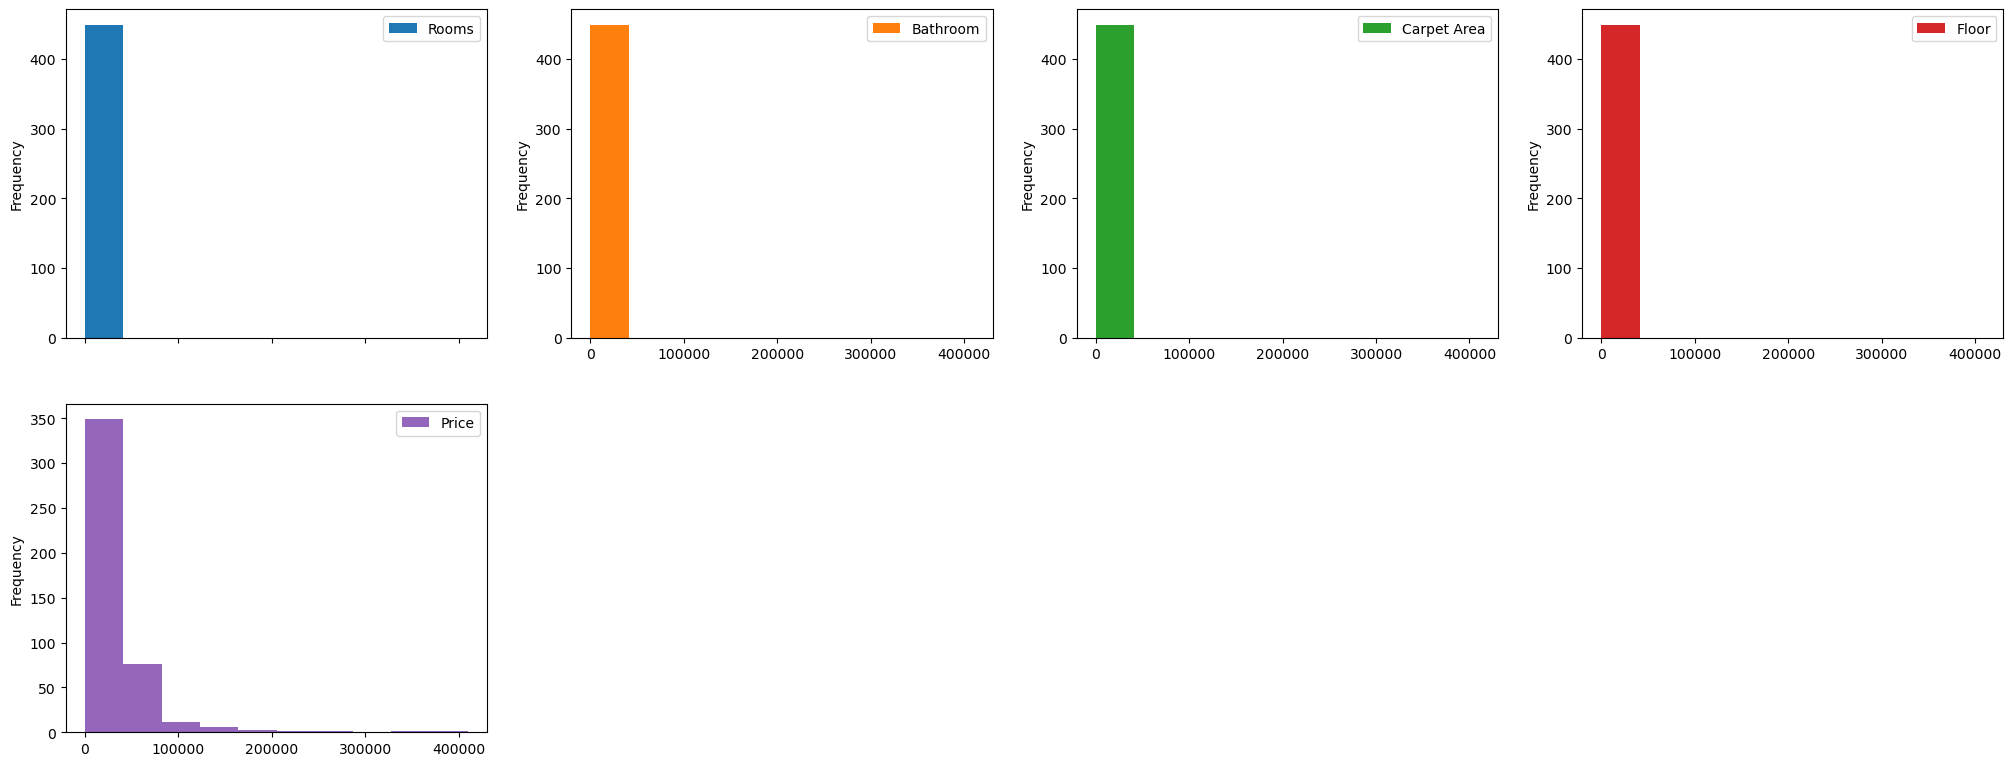

In [23]:
#Histogram
Data1[numerical_columns].plot(kind='hist',
                             subplots=True,
                             figsize=(25,35),
                             layout=(7,4))

In [24]:
######## Univariate analysis #########

In [25]:
def numerical(Data1,column):
    print(Data1[column].agg(['min','max','mean','median','std','skew']))
    print()
    
    #Distribution
    plt.figure(figsize=(15,10))
    
    #Histogram
    plt.subplot(2,2,1)
    Data1[column].plot(kind='hist',bins=10)
    plt.title('Histogram Plot')
    plt.xlabel(column)
    plt.ylabel('Friquency')
    
    #KDE Plot
    plt.subplot(2,2,2)
    Data1[column].plot(kind='kde')
    plt.title('KDE Plot')
    plt.xlabel(column)
    plt.ylabel('Friquency')
    
    #Box Plot
    plt.subplot(2,2,3)
    Data1[column].plot(kind='box')
    plt.title('QQ for Normal Distribution')

In [26]:
# create a function to find outliers
def iqr(dataset, column):
    q1=dataset[column].quantile(0.25)
    q3=dataset[column].quantile(0.75)
    IQR=q3-q1
    lower_limit=(q1-IQR*1.5)
    upper_limit=(q3+IQR*1.5)
    outliers=(dataset[column] < lower_limit) | (dataset[column] > upper_limit)
    return len(dataset[outliers])

# adjust outlier with statistical method
def impute_outliers(dataset, column):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    # Replace outliers with the median
    median_value = dataset[column].median()
    dataset[column] = dataset[column].apply(lambda x: median_value if x < lower_limit or x > upper_limit else x)
    return dataset



In [27]:
####### Price ########## conclusion

min            0.000000
max       410000.000000
mean       35430.405345
median     27000.000000
std        36604.684893
skew           5.194814
Name: Price, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :-  38
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

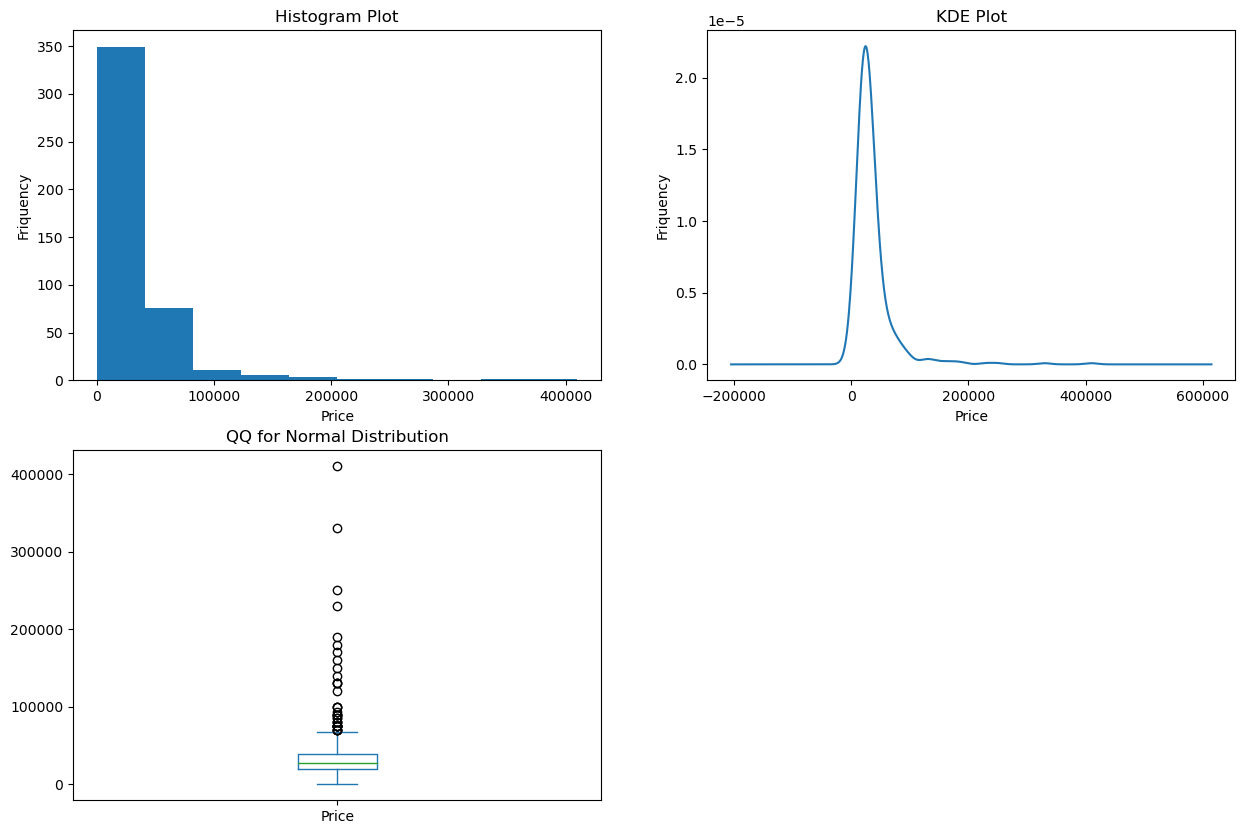

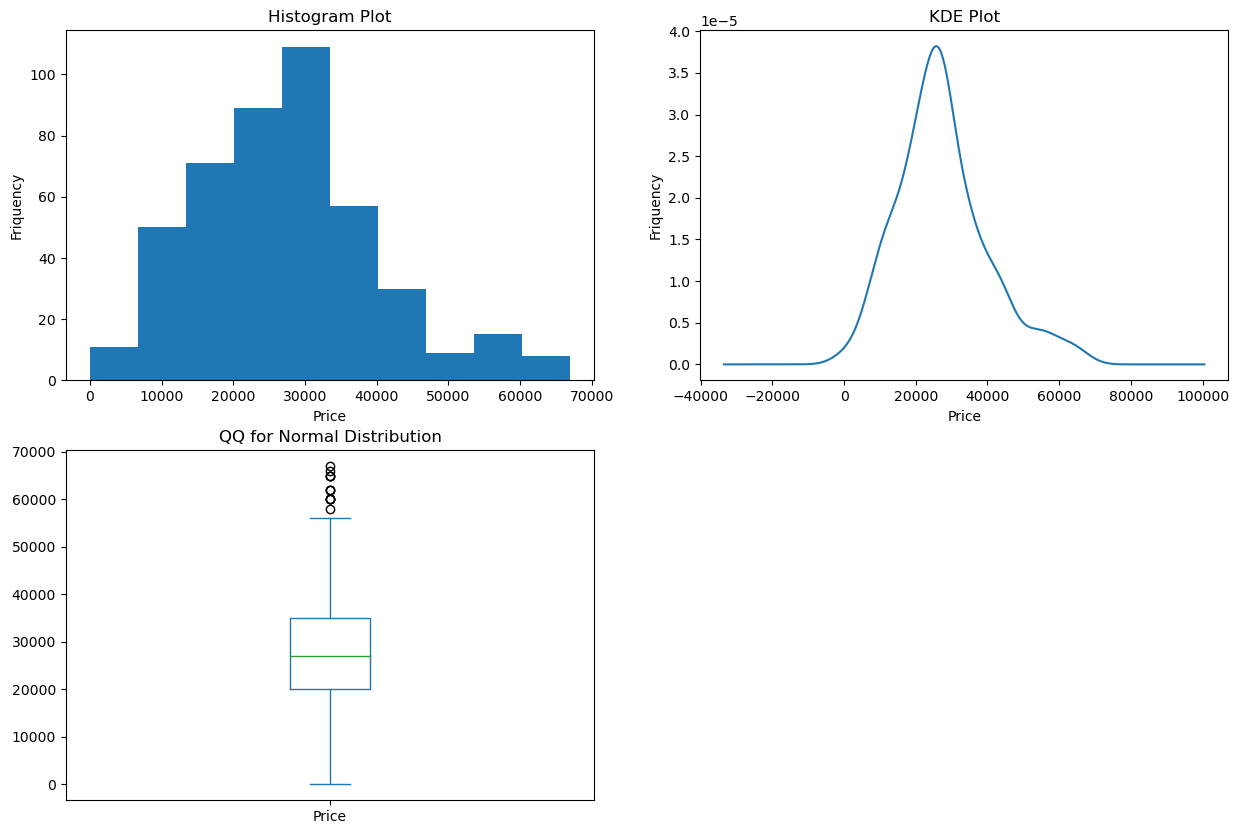

In [28]:
numerical(Data1, 'Price')
print('-'*500)
print('IQR is :- ',iqr(Data1, 'Price'))
print('-'*500)
cleaned_data= impute_outliers(Data1.copy(), 'Price')
numerical(cleaned_data, 'Price')

min       1.000000
max       6.000000
mean      2.084633
median    2.000000
std       0.867035
skew      1.197853
Name: Bathroom, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :-  203
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

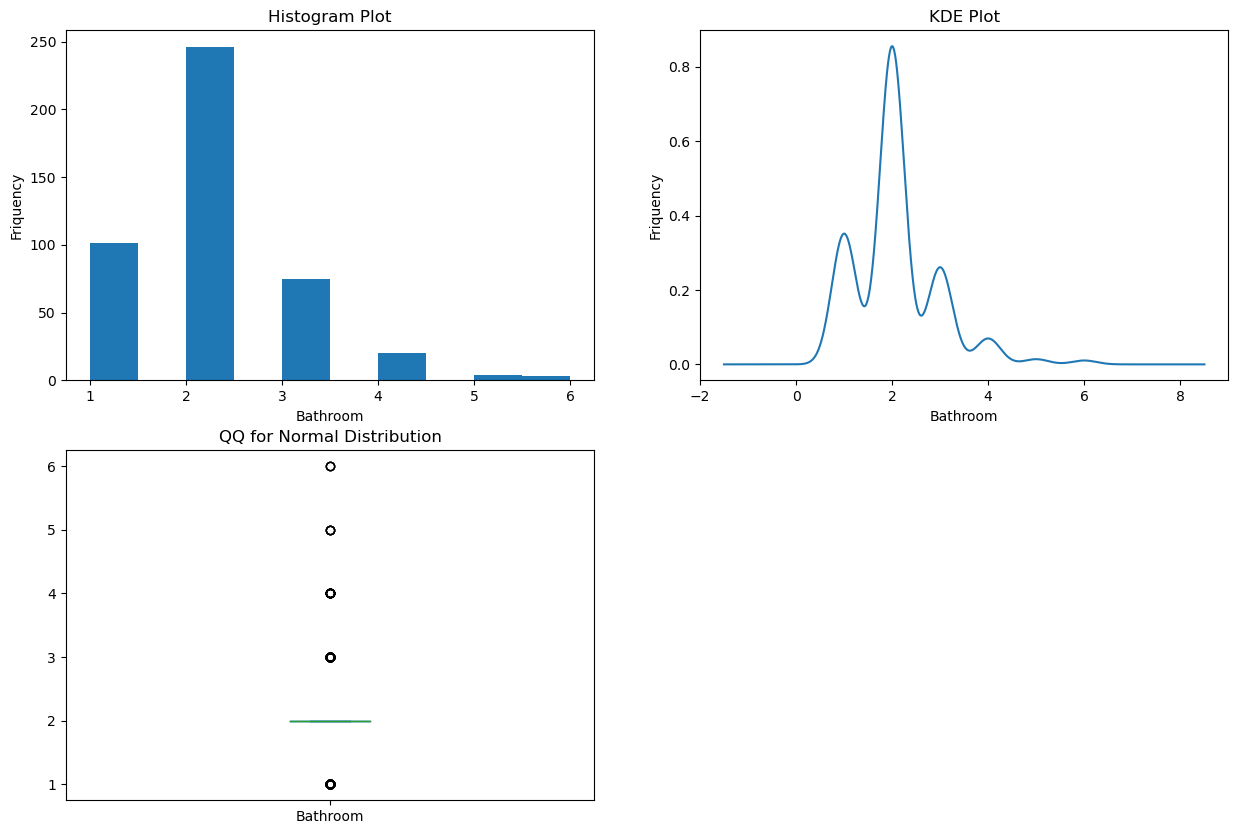

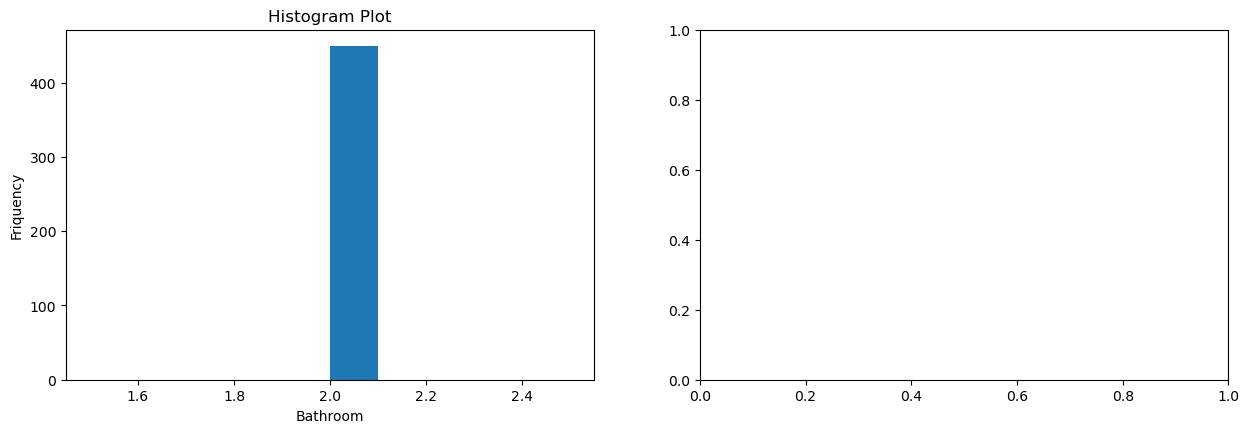

In [29]:
numerical(Data1, 'Bathroom')
print('-'*500)
print('IQR is :- ',iqr(Data1, 'Bathroom'))
print('-'*500)
cleaned_data= impute_outliers(Data1.copy(), 'Bathroom')
numerical(cleaned_data, 'Bathroom')

min        195.000000
max       3800.000000
mean       928.619154
median     825.000000
std        471.330478
skew         3.059443
Name: Carpet Area, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :-  69
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

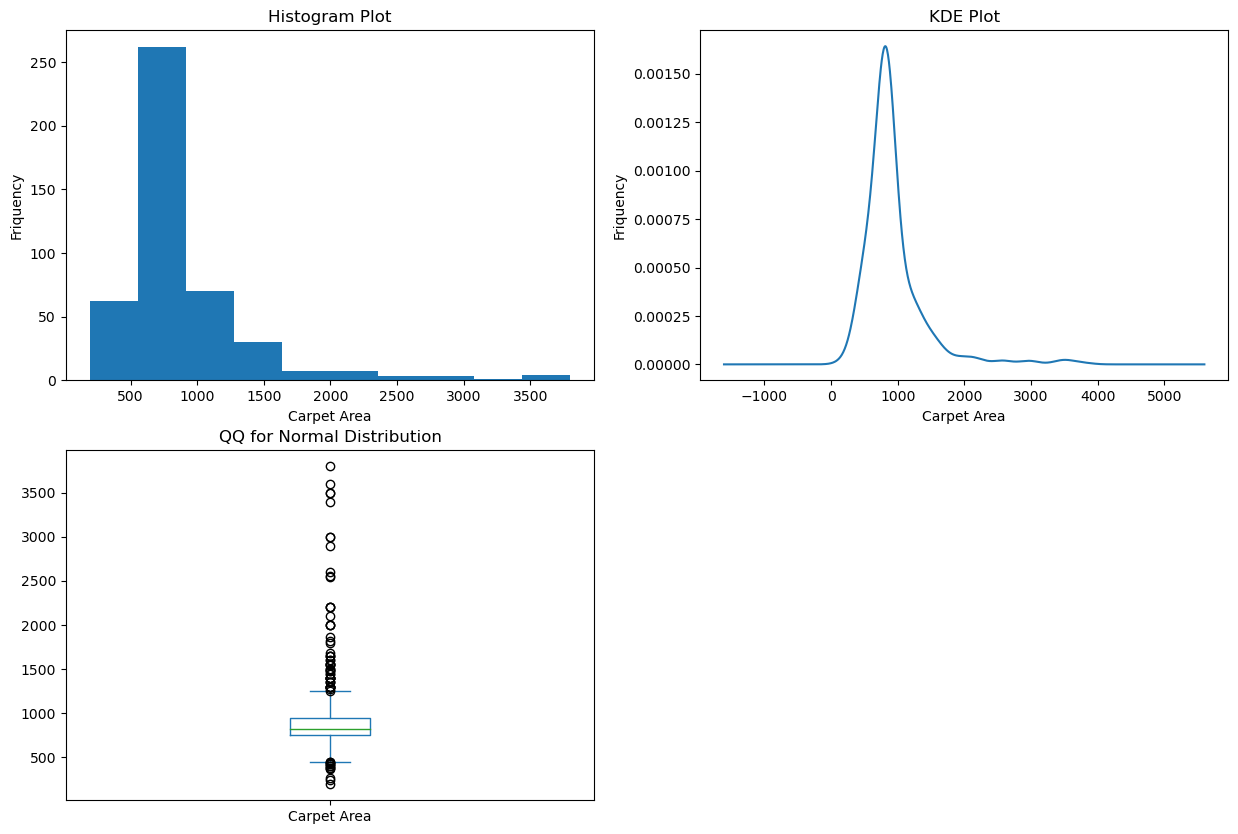

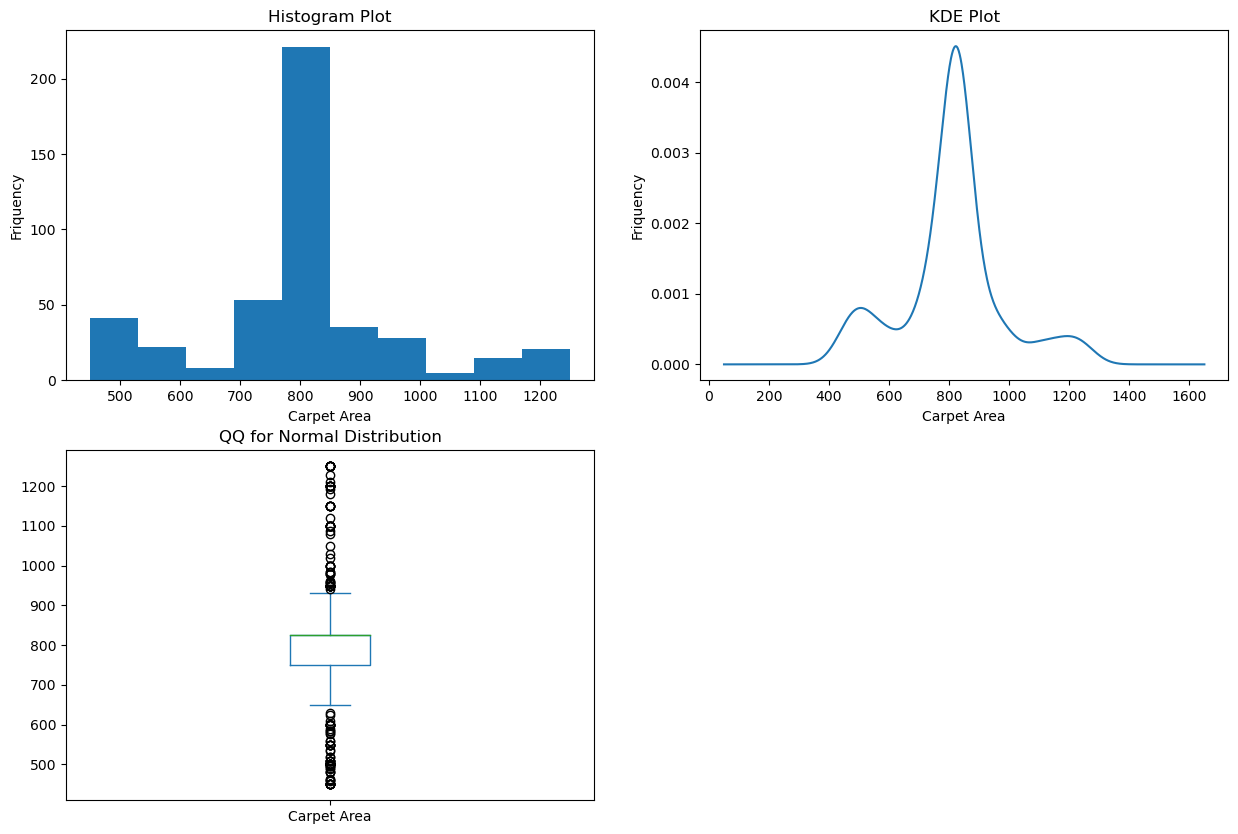

In [30]:
numerical(Data1, 'Carpet Area')
print('-'*500)
print('IQR is :- ',iqr(Data1, 'Carpet Area'))
print('-'*500)
cleaned_data= impute_outliers(Data1.copy(), 'Carpet Area')
numerical(cleaned_data, 'Carpet Area')

min        0.000000
max       32.000000
mean       5.946548
median     5.000000
std        4.413534
skew       1.573109
Name: Floor, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :-  15
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

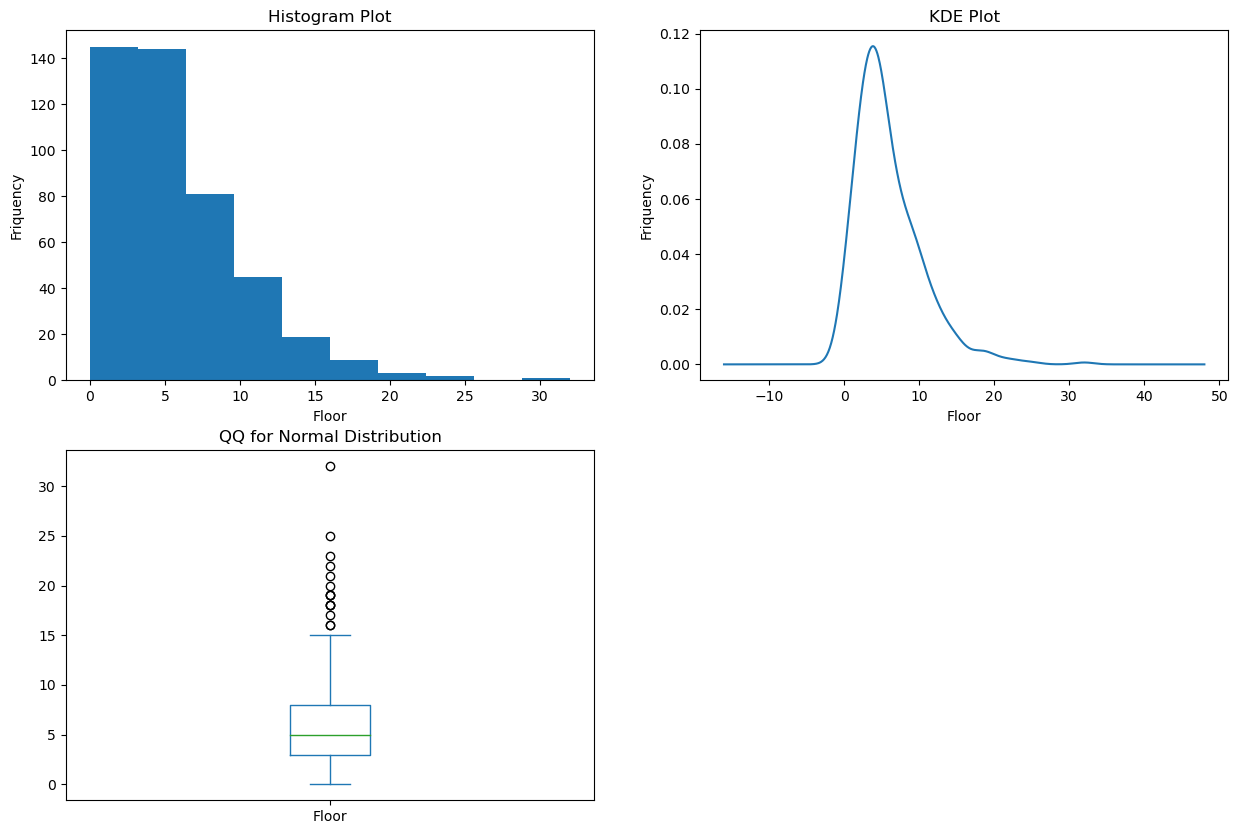

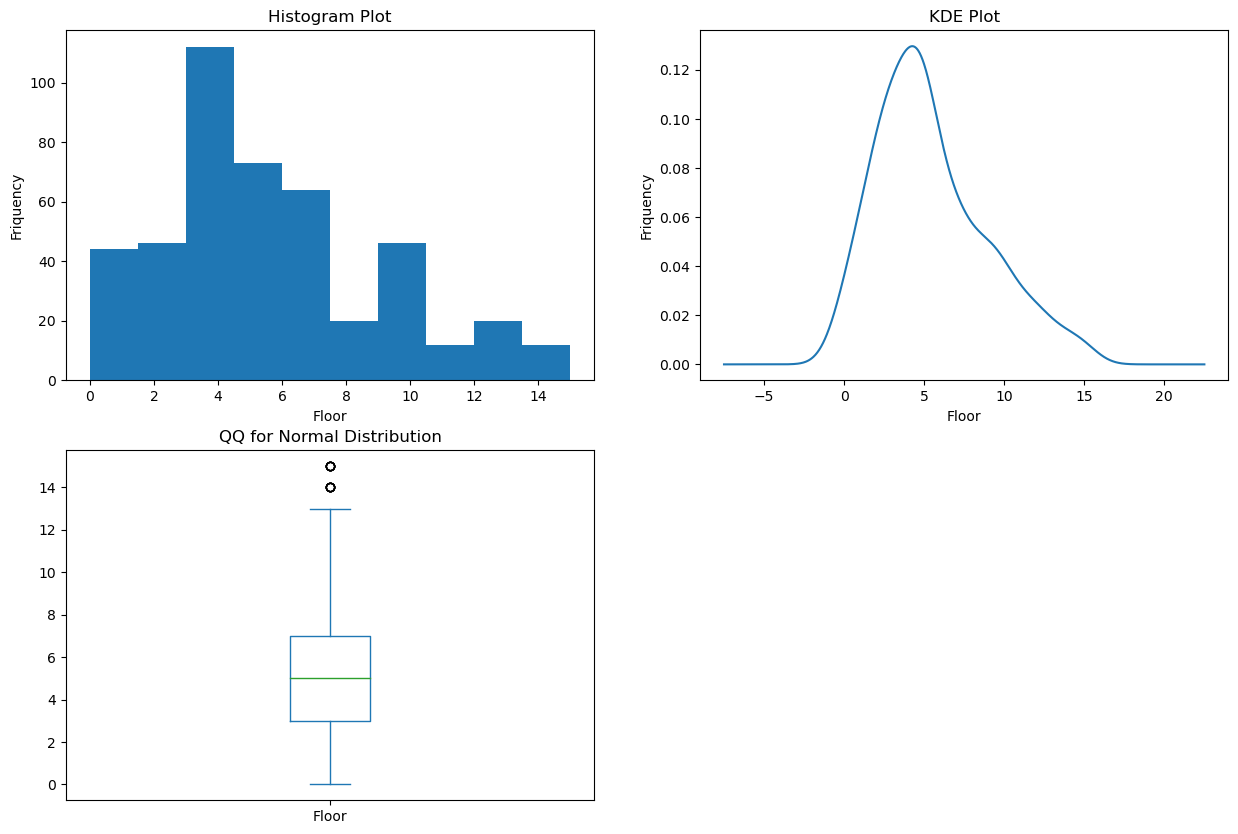

In [31]:
numerical(Data1, 'Floor')
print('-'*500)
print('IQR is :- ',iqr(Data1, 'Floor'))
print('-'*500)
cleaned_data= impute_outliers(Data1.copy(), 'Floor')
numerical(cleaned_data, 'Floor')

In [32]:
########## univariate analysis ######### Categorical#######

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def categorical(df, column_name, save_path=None):
    if column_name in df:
        # Get the top 10 
        top_10 = df[column_name].value_counts().head(10)
        print(f"Top 10 Categories for '{column_name}':")
        print(top_10)
        print()

        # Bar plot 
        plt.figure(figsize=(8, 4))
        top_10.plot(kind='bar', color='green')
        plt.title(f'Top 10 - Bar plot for {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')

        # Save
        if save_path:
            bar_plot_path = f"{save_path}_bar_plot.png"
            plt.savefig(bar_plot_path)
            print(f"Bar plot saved at: {bar_plot_path}")

        plt.show()

        # Count plot 
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[column_name], order=top_10.index)
        plt.title(f'Top 10 - Count plot for {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Save 
        if save_path:
            count_plot_path = f"{save_path}_count_plot.png"
            plt.savefig(count_plot_path)
            print(f"Count plot saved at: {count_plot_path}")

        plt.show()

        # Pie chart 
        plt.figure(figsize=(8, 8))
        top_10.plot(kind='pie', autopct="%1.1f%%", startangle=90, labeldistance=1.1)
        plt.title(f'Top 10 - Pie chart for {column_name}')
        plt.xticks(fontsize=10)

        # Save 
        if save_path:
            pie_chart_path = f"{save_path}_pie_chart.png"
            plt.savefig(pie_chart_path)
            print(f"Pie chart saved at: {pie_chart_path}")

        plt.show()

Top 10 Categories for 'Furnishing':
Furnishing
Unfurnished       204
Semi-Furnished    143
Furnished         102
Name: count, dtype: int64



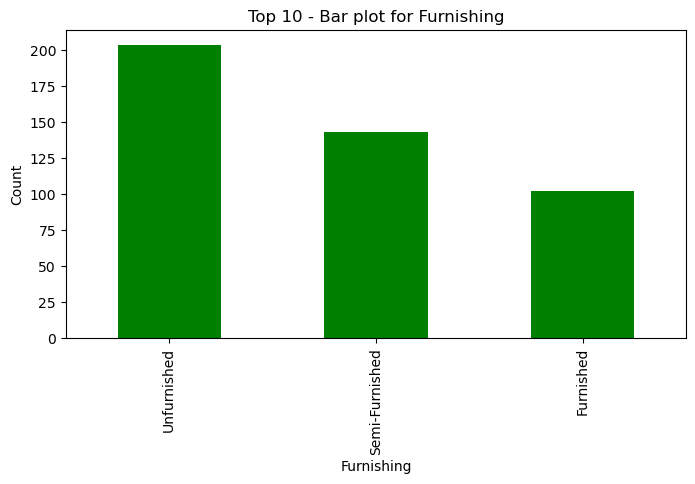

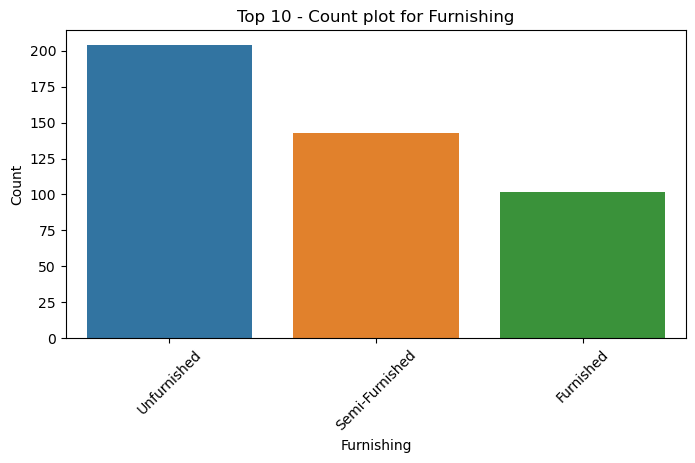

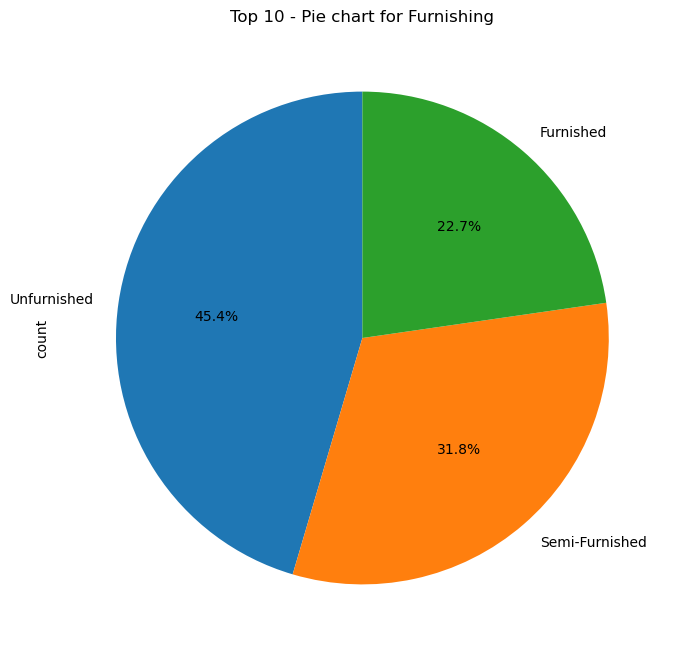

In [34]:
#Furnishing
categorical(Data1,'Furnishing')

Top 10 Categories for 'Availability':
Availability
Immediately     438
From Mar '25      9
From Apr '25      2
Name: count, dtype: int64



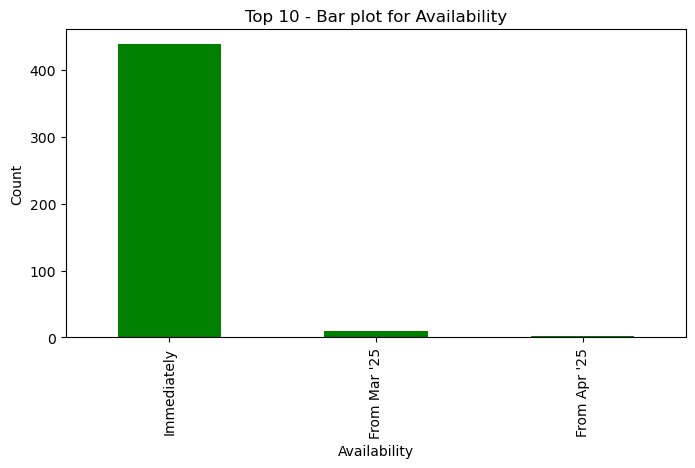

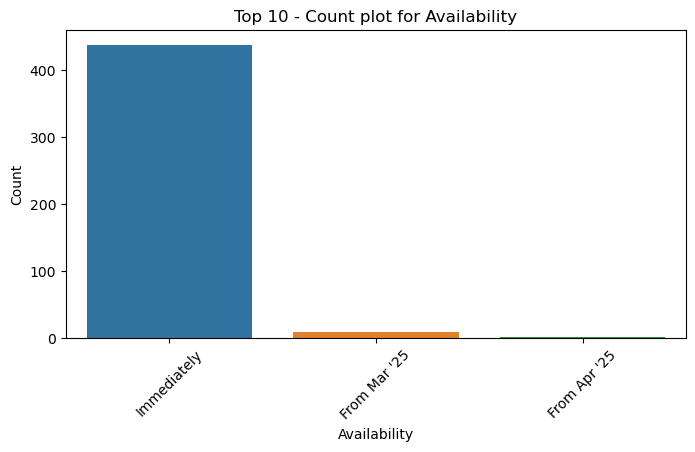

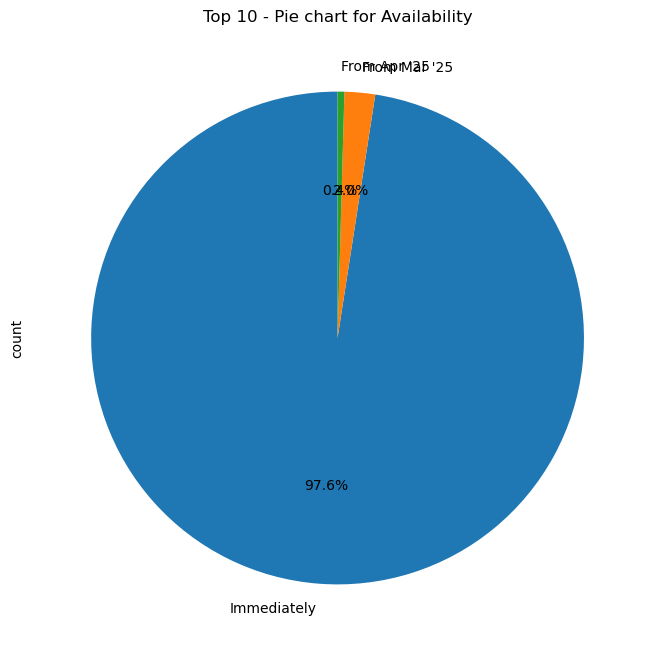

In [35]:
categorical(Data1,'Availability')

Top 10 Categories for 'Location':
Location
Hinjawadi,                  23
Hadapsar,                   16
Wakad,                      16
Kharadi,                    15
Kalyani Nagar,              14
Balewadi,                   13
Baner,                      13
Koregaon Park,              12
Magarpatta,                 12
EON Free Zone, Kharadi,     12
Name: count, dtype: int64



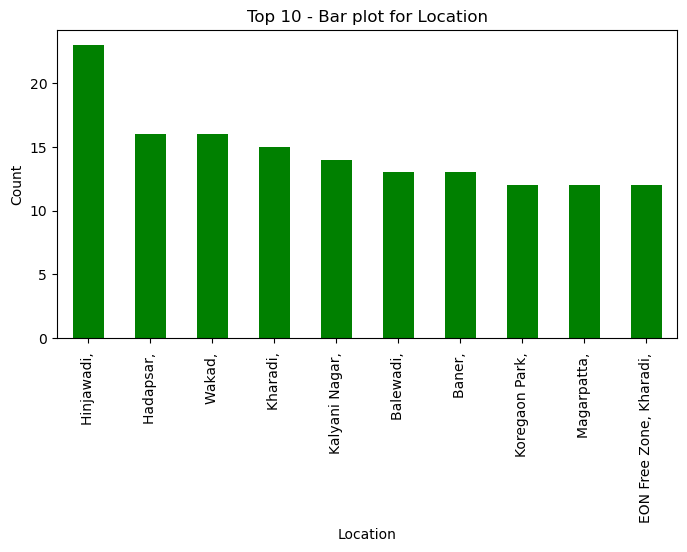

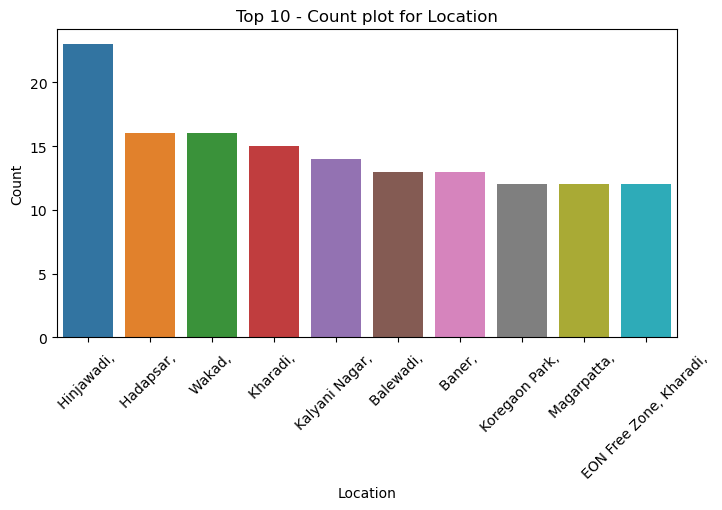

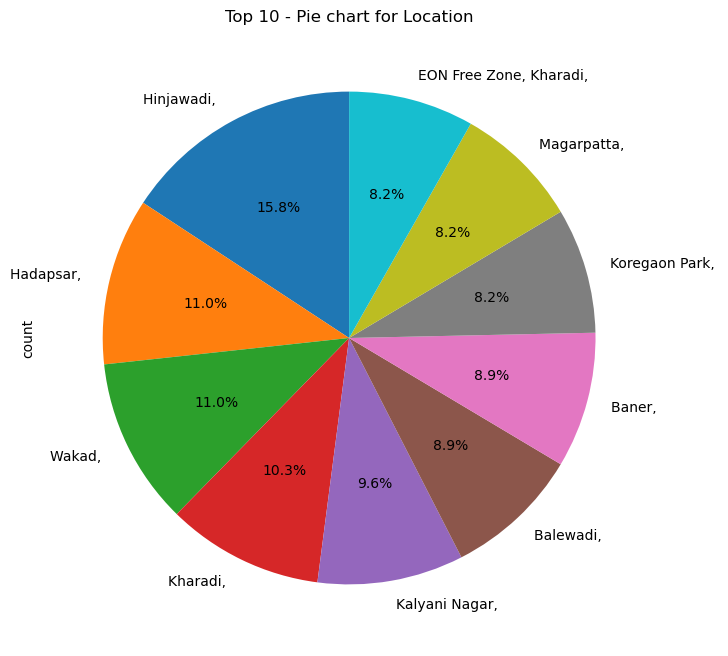

In [36]:
categorical(Data1,'Location')

In [39]:
######## Bivariate Analysis ########


In [40]:
print(numerical_columns)
print('-'*50)
print(categorical_columns)

['Rooms', 'Bathroom', 'Carpet Area', 'Floor', 'Price']
--------------------------------------------------
['Furnishing', 'Availability', 'Location']


In [41]:
#### cat v/s num #######

In [42]:
def cat_num(dataframe, categorical, numerical_columns, head_value=10, adjust_outliers_with_median=False, save_path=None):
    if head_value:
        # Get top categories
        top_categories = dataframe[categorical].value_counts(normalize=True).head(head_value).index.tolist()
        dataframe = dataframe[dataframe[categorical].isin(top_categories)]
  
    for num in numerical_columns:
        if adjust_outliers_with_median:
            # Replace outliers with median
            dataframe = replace_outliers_with_median(dataframe, num)
        
        group_data = dataframe.groupby(categorical)[num].agg(['mean', 'median', 'min', 'max'])
        print(f"Group statistics for {num}:")
        print(group_data)
        print()
        plt.figure(figsize=(15, 15))

        # Bar plot
        plt.subplot(2, 2, 1)
        sns.barplot(data=dataframe, y=categorical, x=num)
        plt.title(f'Bar plot for {num}')
        if save_path:
            bar_plot_path = f"{save_path}_{num}_bar_plot.png"
            plt.savefig(bar_plot_path)
            print(f"Bar plot saved at: {bar_plot_path}")
        
        # Box plot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=categorical, x=num, data=dataframe)
        plt.title(f'Box plot for {num}')
        if save_path:
            box_plot_path = f"{save_path}_{num}_box_plot.png"
            plt.savefig(box_plot_path)
            print(f"Box plot saved at: {box_plot_path}")
        
        # Violin plot
        plt.subplot(2, 2, 3)
        sns.violinplot(y=categorical, x=num, data=dataframe)
        plt.title(f'Violin plot for {num}')
        if save_path:
            violin_plot_path = f"{save_path}_{num}_violin_plot.png"
            plt.savefig(violin_plot_path)
            print(f"Violin plot saved at: {violin_plot_path}")

        # Scatter plot
        plt.subplot(2, 2, 4)
        sns.scatterplot(x=categorical, y=num, data=dataframe)
        plt.title(f'Scatter plot for {num}')
        plt.xticks(rotation=45)
        if save_path:
            scatter_plot_path = f"{save_path}_{num}_scatter_plot.png"
            plt.savefig(scatter_plot_path)
            print(f"Scatter plot saved at: {scatter_plot_path}")

        plt.show()


Group statistics for Rooms:
                    mean  median  min  max
Furnishing                                
Furnished       2.156863     2.0    0    4
Semi-Furnished  2.118881     2.0    0    4
Unfurnished     1.926471     2.0    0    4



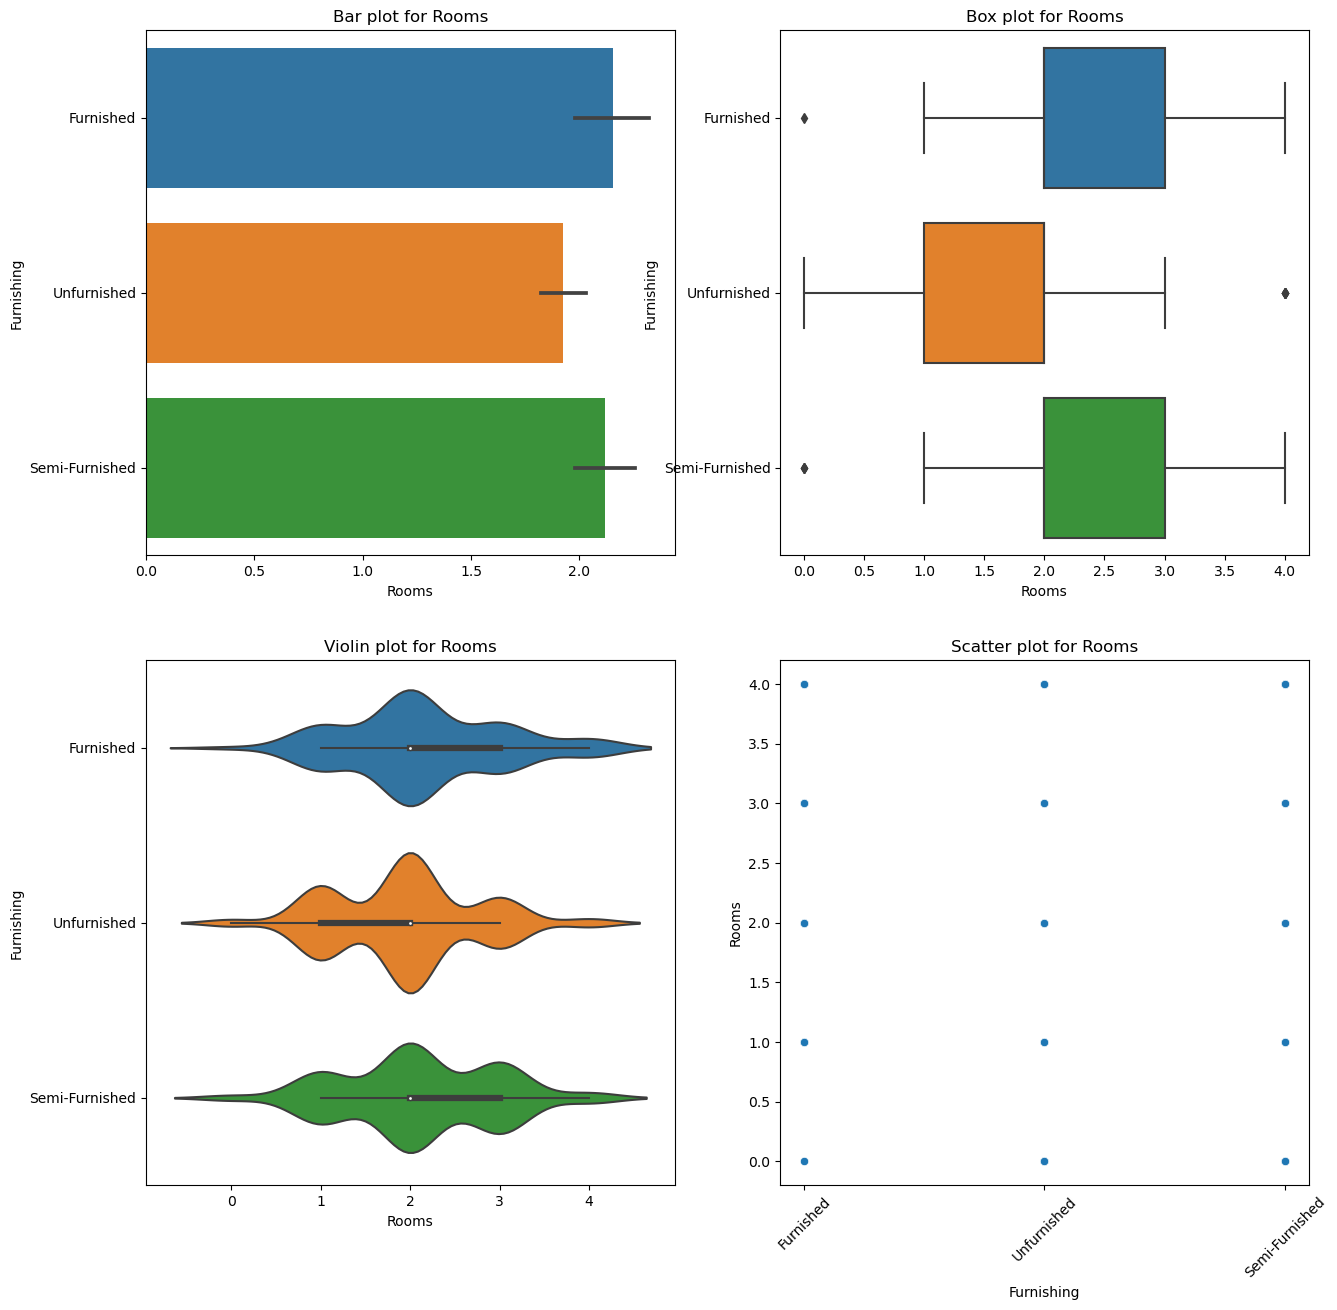

Group statistics for Bathroom:
                    mean  median  min  max
Furnishing                                
Furnished       2.225490     2.0    1    6
Semi-Furnished  2.153846     2.0    1    5
Unfurnished     1.965686     2.0    1    6



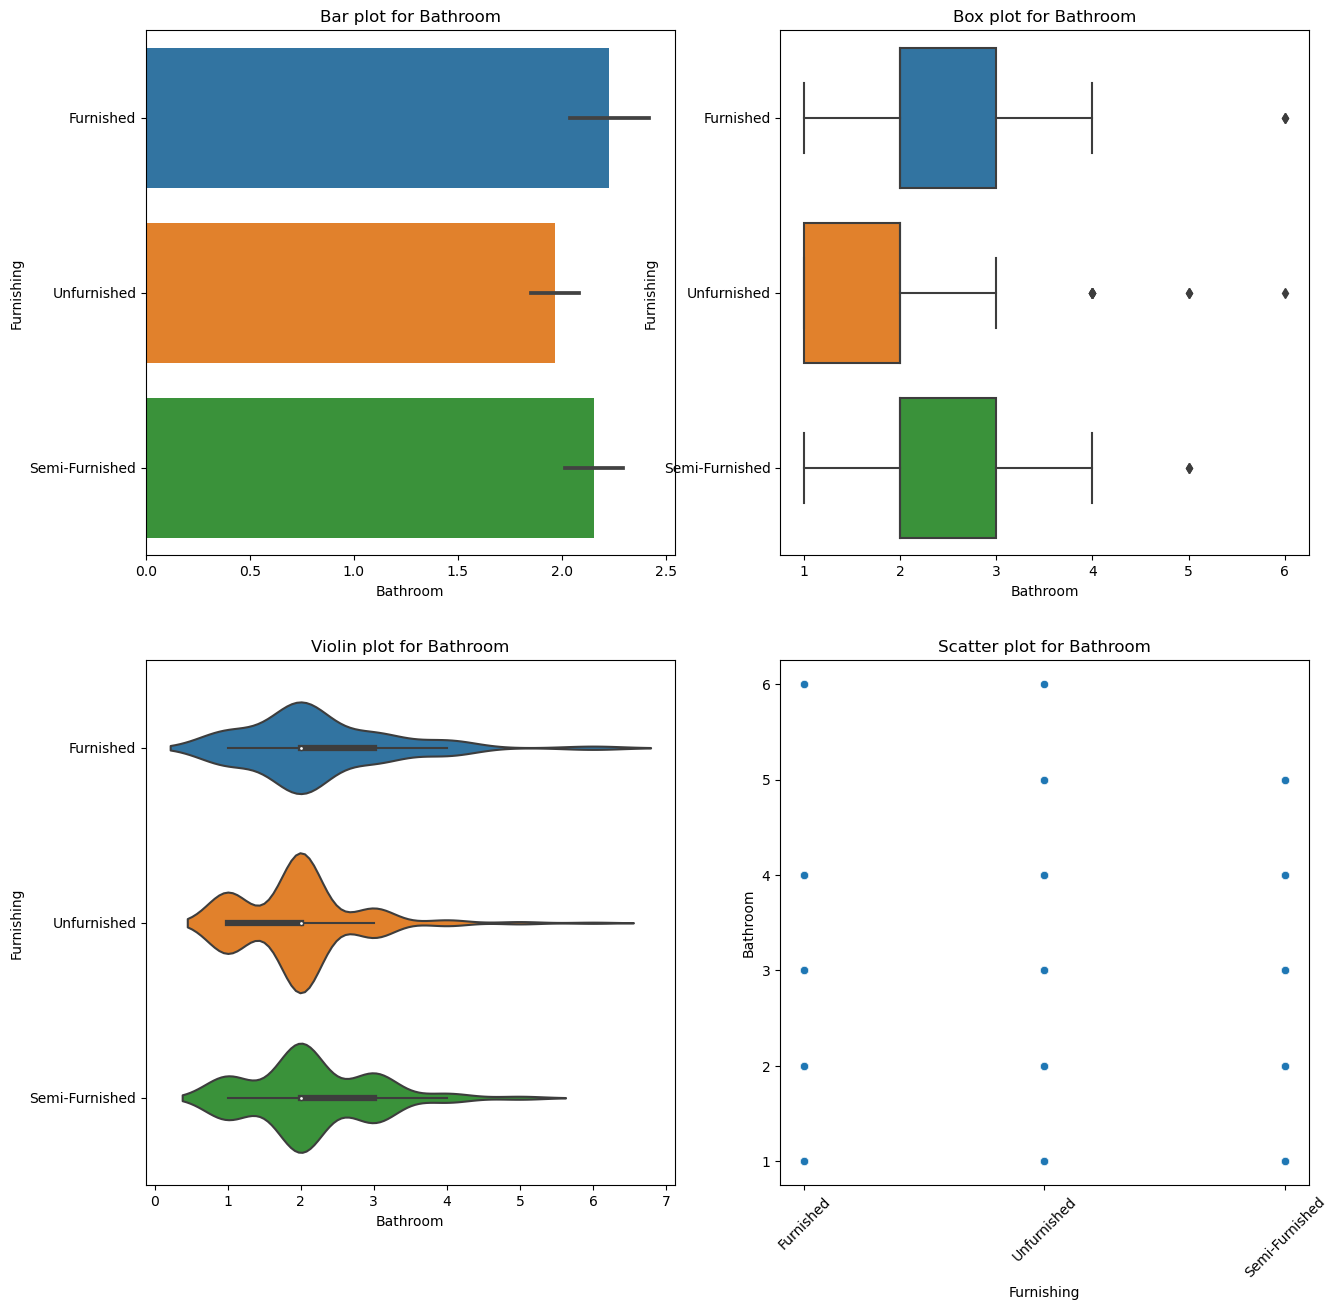

Group statistics for Carpet Area:
                      mean  median    min     max
Furnishing                                       
Furnished       976.313725   825.0  195.0  3500.0
Semi-Furnished  951.258741   825.0  250.0  3800.0
Unfurnished     888.901961   825.0  375.0  3399.0



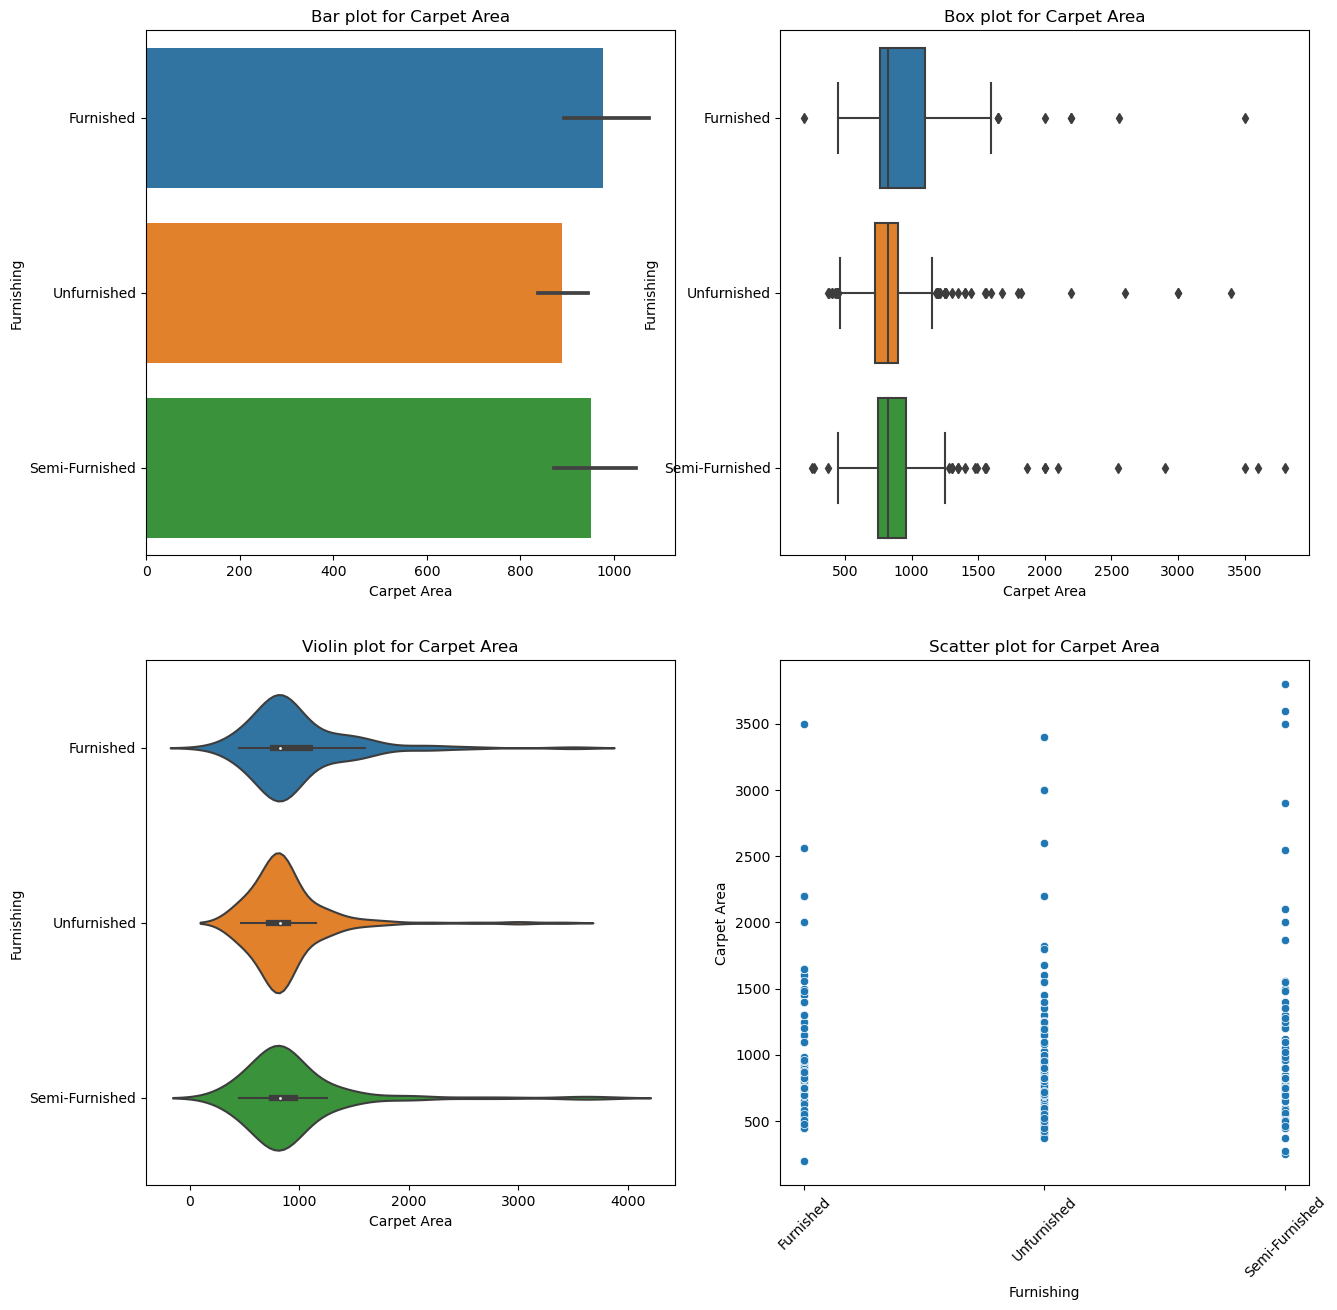

Group statistics for Floor:
                    mean  median  min  max
Furnishing                                
Furnished       5.774510     5.0    0   32
Semi-Furnished  6.090909     5.0    0   25
Unfurnished     5.931373     5.0    0   23



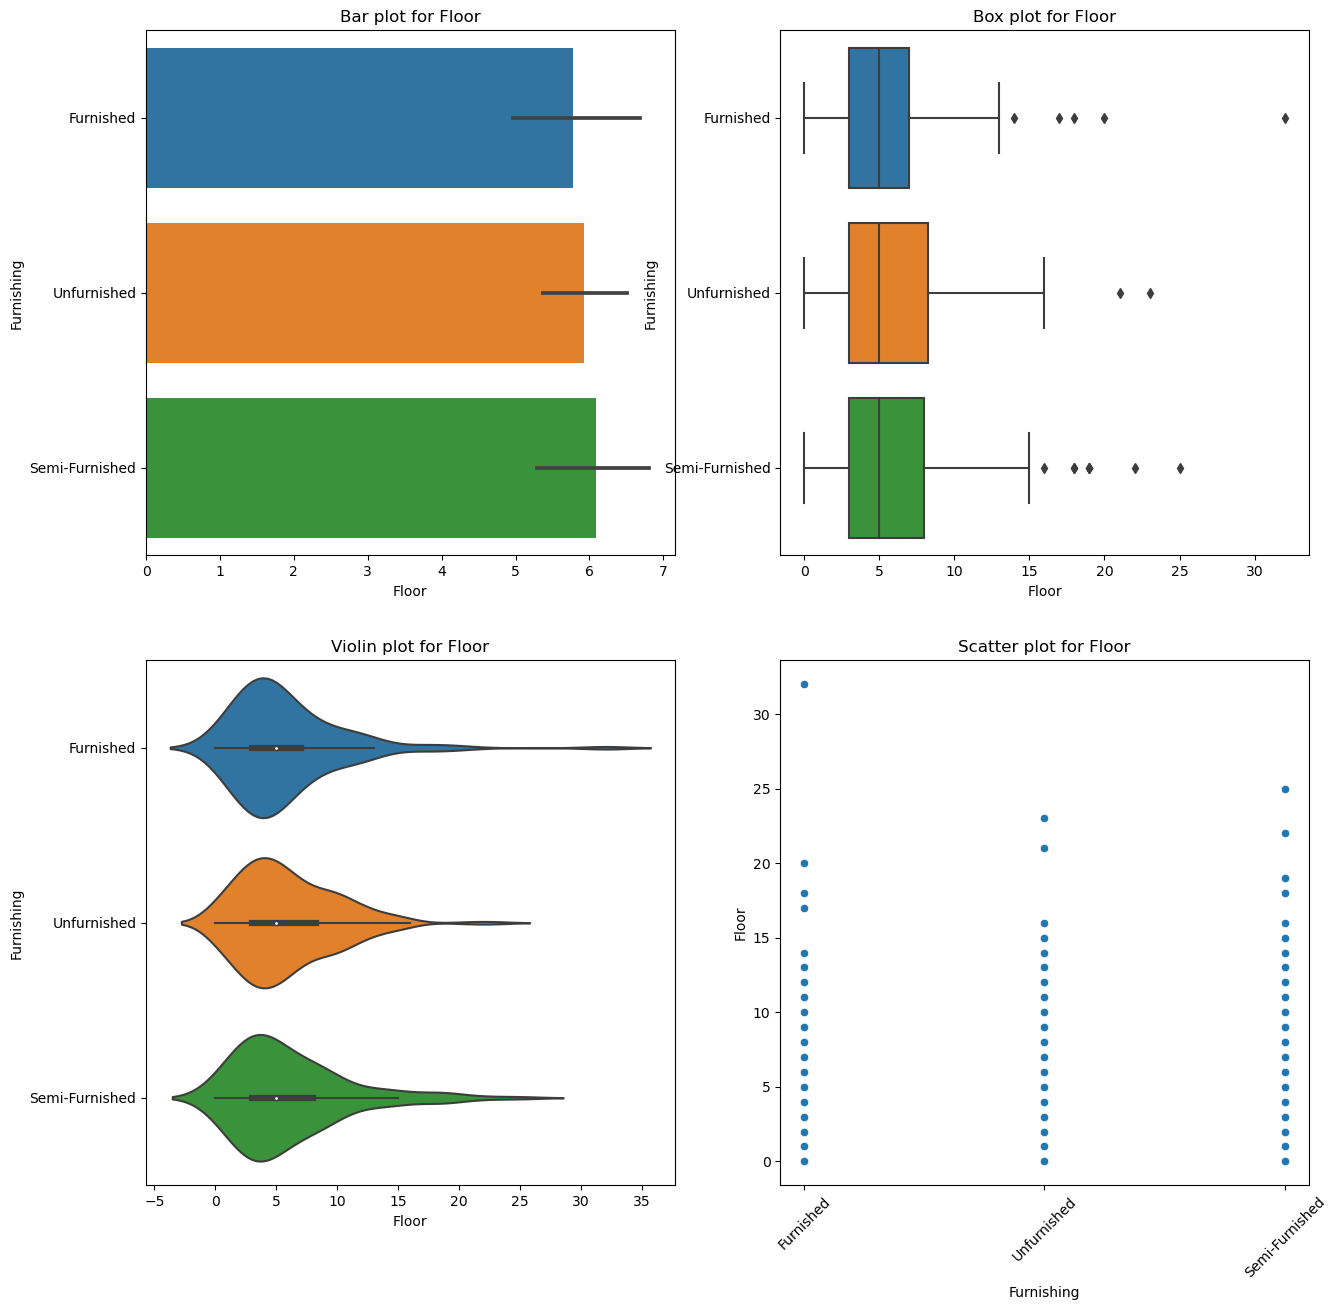

Group statistics for Price:
                        mean   median     min       max
Furnishing                                             
Furnished       46313.725490  33500.0     0.0  250000.0
Semi-Furnished  33876.216783  27500.0  5000.0  130000.0
Unfurnished     31078.200980  23500.0     0.0  410000.0



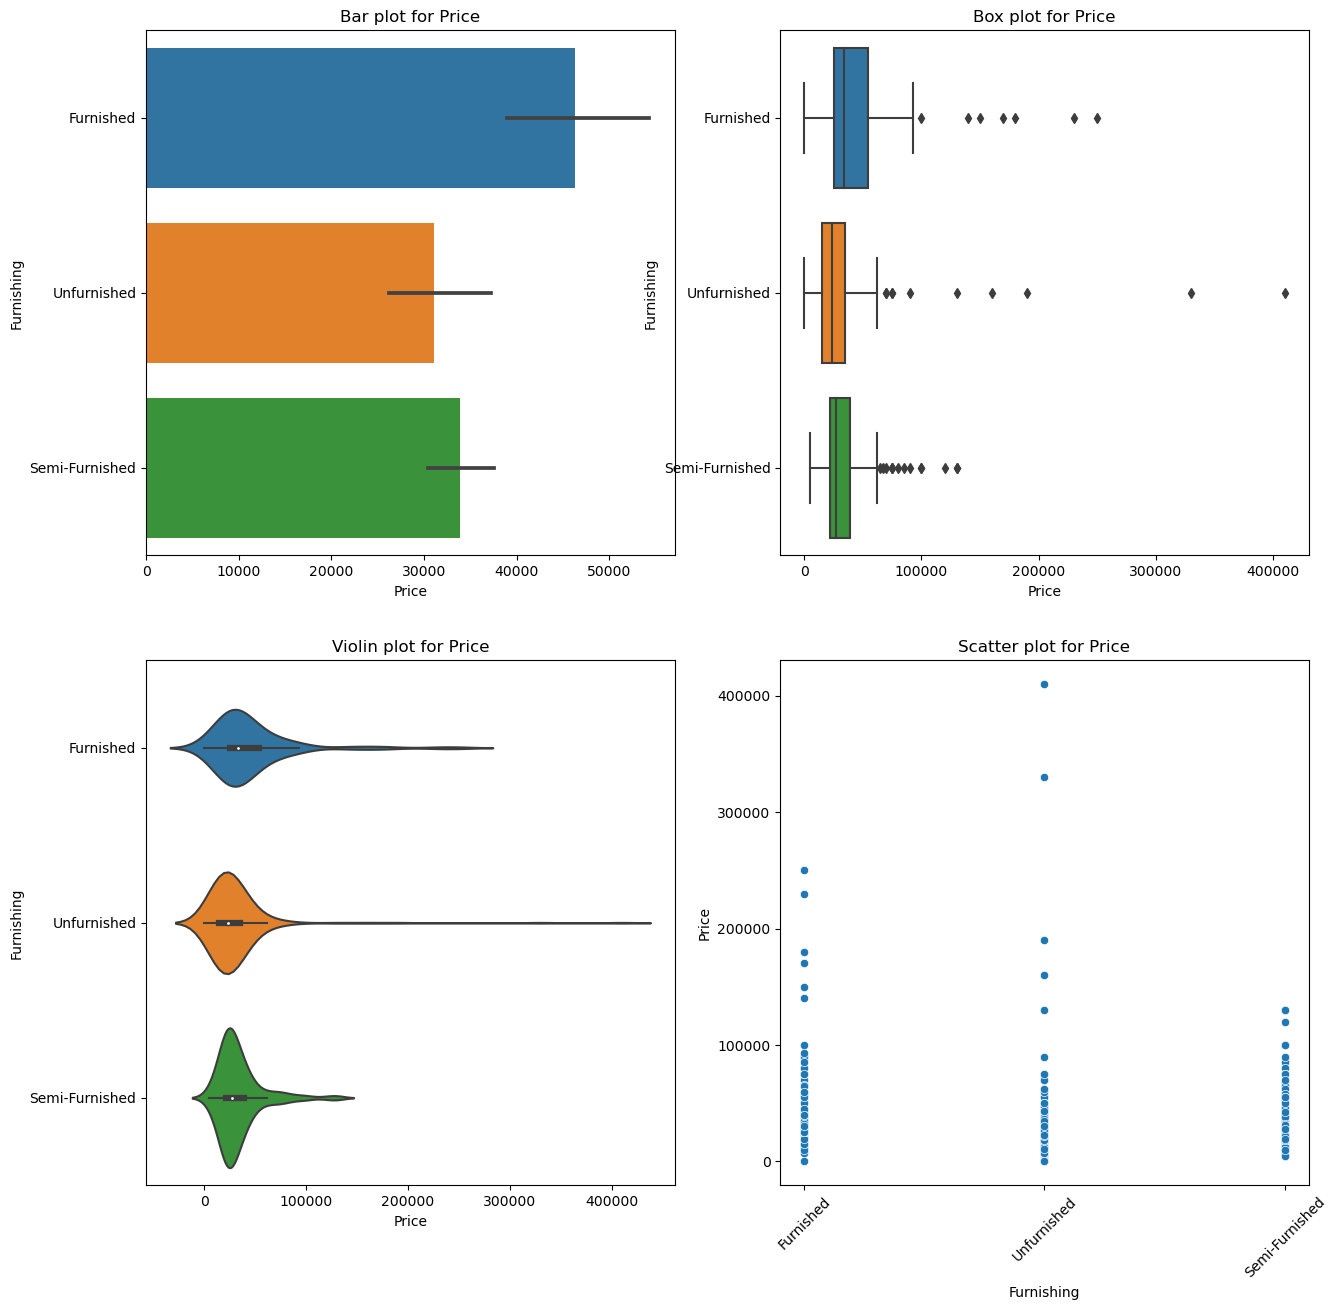

In [43]:
cat_num(Data1,'Furnishing',numerical_columns)

Group statistics for Rooms:
                  mean  median  min  max
Availability                            
From Apr '25  2.500000     2.5    2    3
From Mar '25  1.888889     2.0    1    3
Immediately   2.041096     2.0    0    4



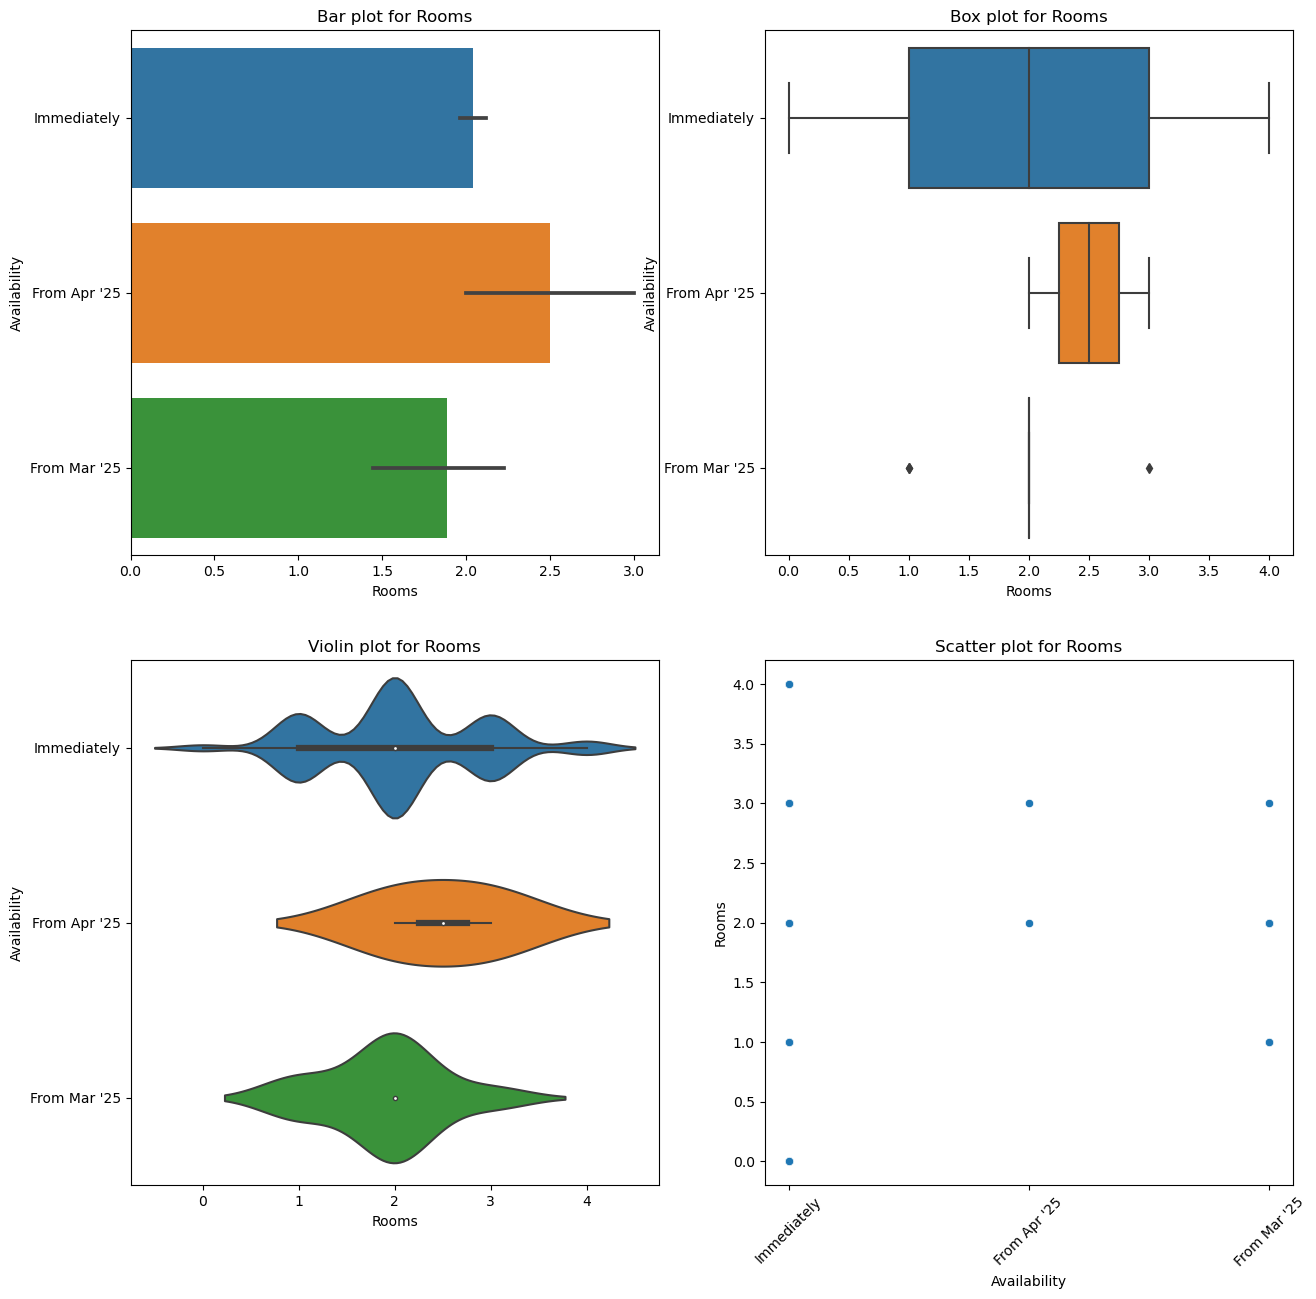

Group statistics for Bathroom:
                  mean  median  min  max
Availability                            
From Apr '25  2.500000     2.5    2    3
From Mar '25  1.888889     2.0    1    3
Immediately   2.086758     2.0    1    6



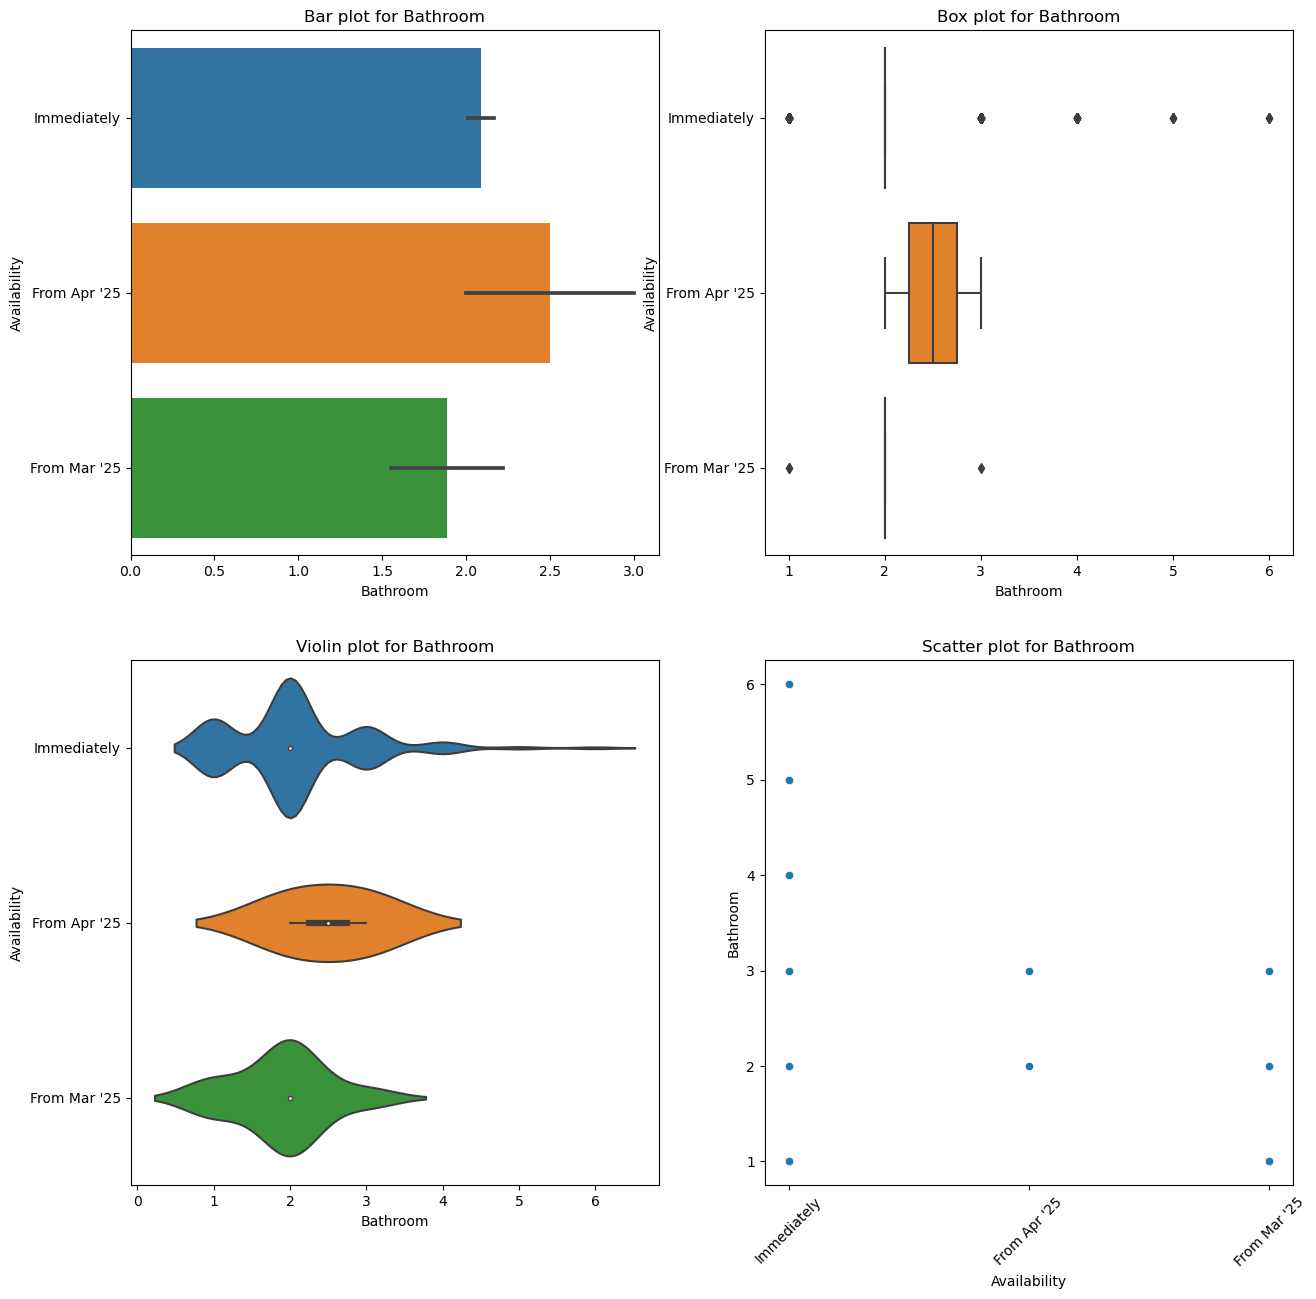

Group statistics for Carpet Area:
                     mean  median    min     max
Availability                                    
From Apr '25  1075.000000  1075.0  900.0  1250.0
From Mar '25   842.222222   825.0  450.0  1150.0
Immediately    929.726027   825.0  195.0  3800.0



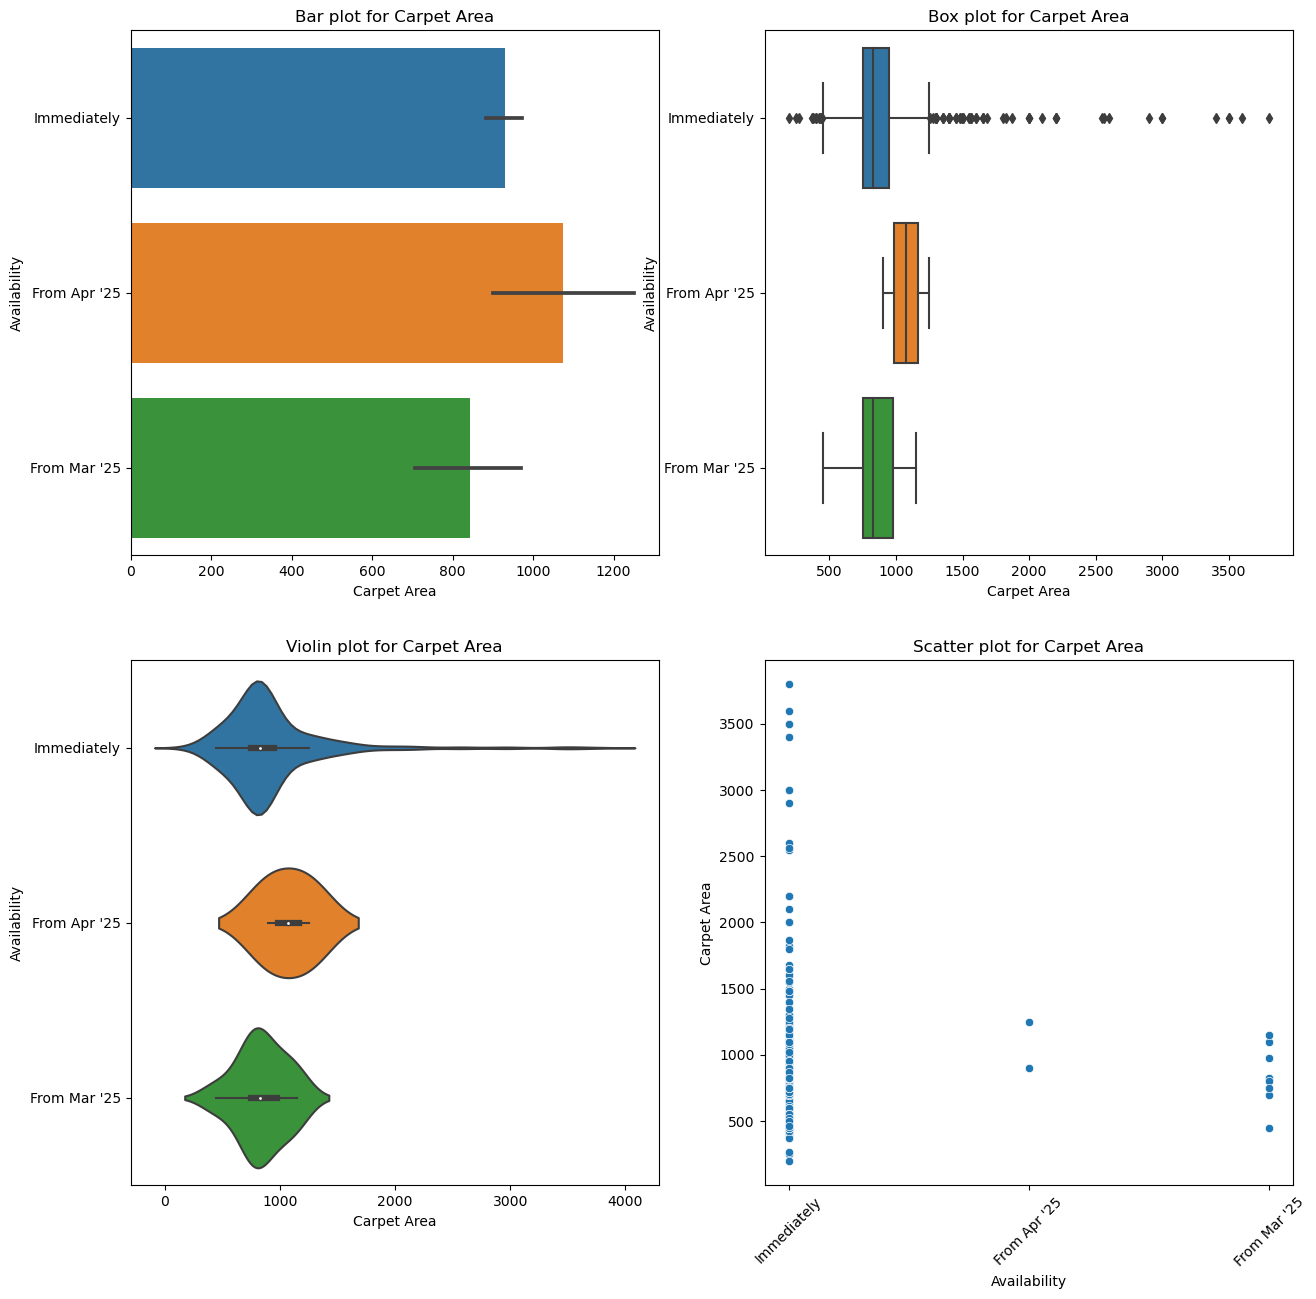

Group statistics for Floor:
                  mean  median  min  max
Availability                            
From Apr '25  5.000000     5.0    5    5
From Mar '25  4.666667     4.0    1   10
Immediately   5.977169     5.0    0   32



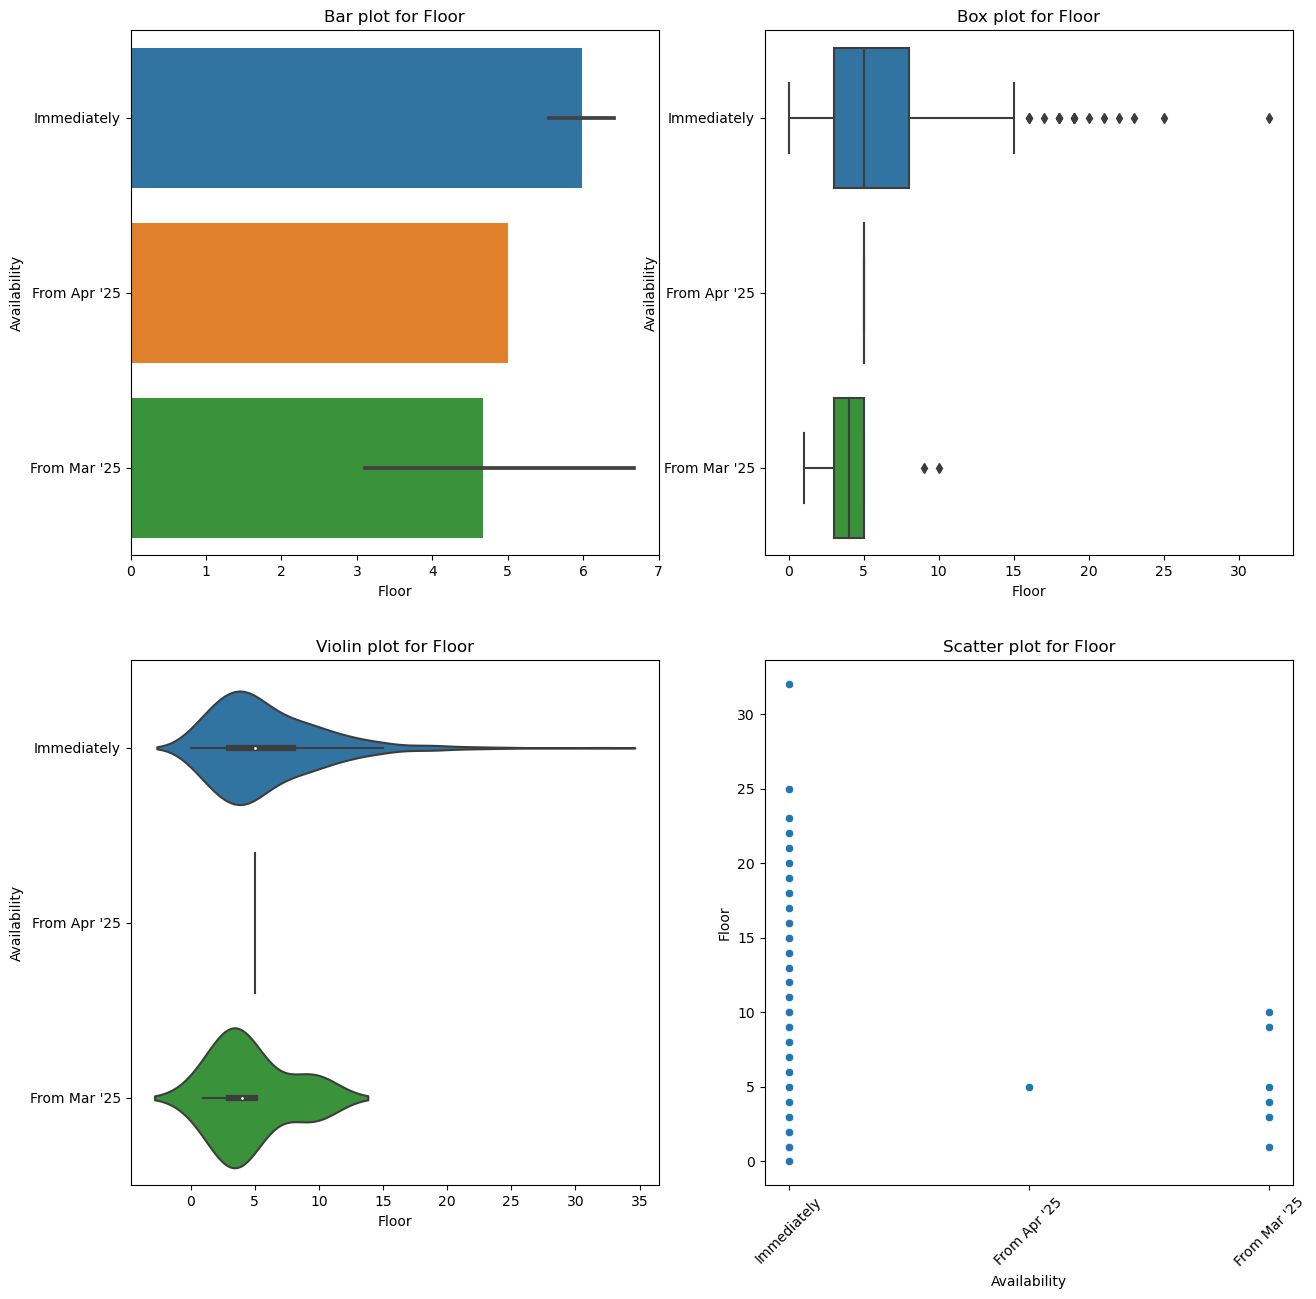

Group statistics for Price:
                      mean   median      min       max
Availability                                          
From Apr '25  46000.000000  46000.0  30000.0   62000.0
From Mar '25  25833.333333  23000.0  15000.0   40000.0
Immediately   35579.342466  27000.0      0.0  410000.0



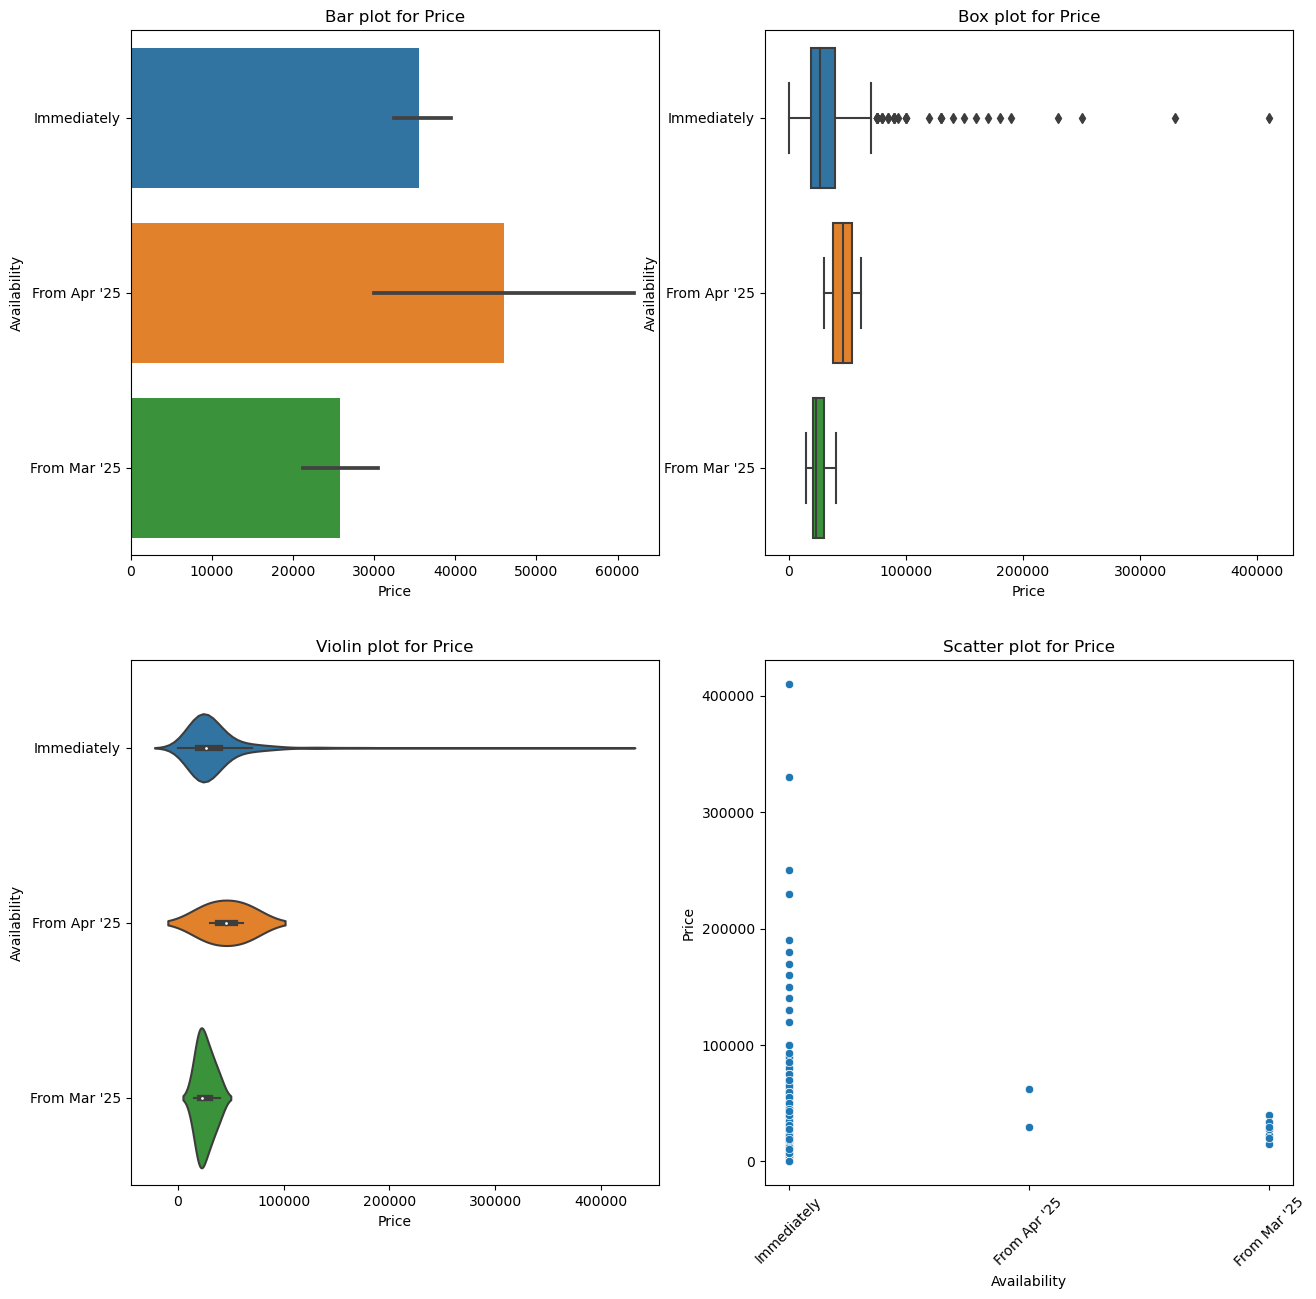

In [44]:
cat_num(Data1,'Availability',numerical_columns)

Group statistics for Rooms:
                              mean  median  min  max
Location                                            
Balewadi,                 2.538462     3.0    2    3
Baner,                    2.692308     2.0    2    4
EON Free Zone, Kharadi,   2.500000     2.5    1    4
Hadapsar,                 1.937500     2.0    1    4
Hinjawadi,                2.000000     2.0    1    3
Kalyani Nagar,            2.142857     2.0    1    3
Kharadi,                  2.400000     2.0    1    4
Koregaon Park,            2.833333     3.0    2    4
Magarpatta,               2.416667     2.5    1    4
Wakad,                    1.937500     2.0    1    3



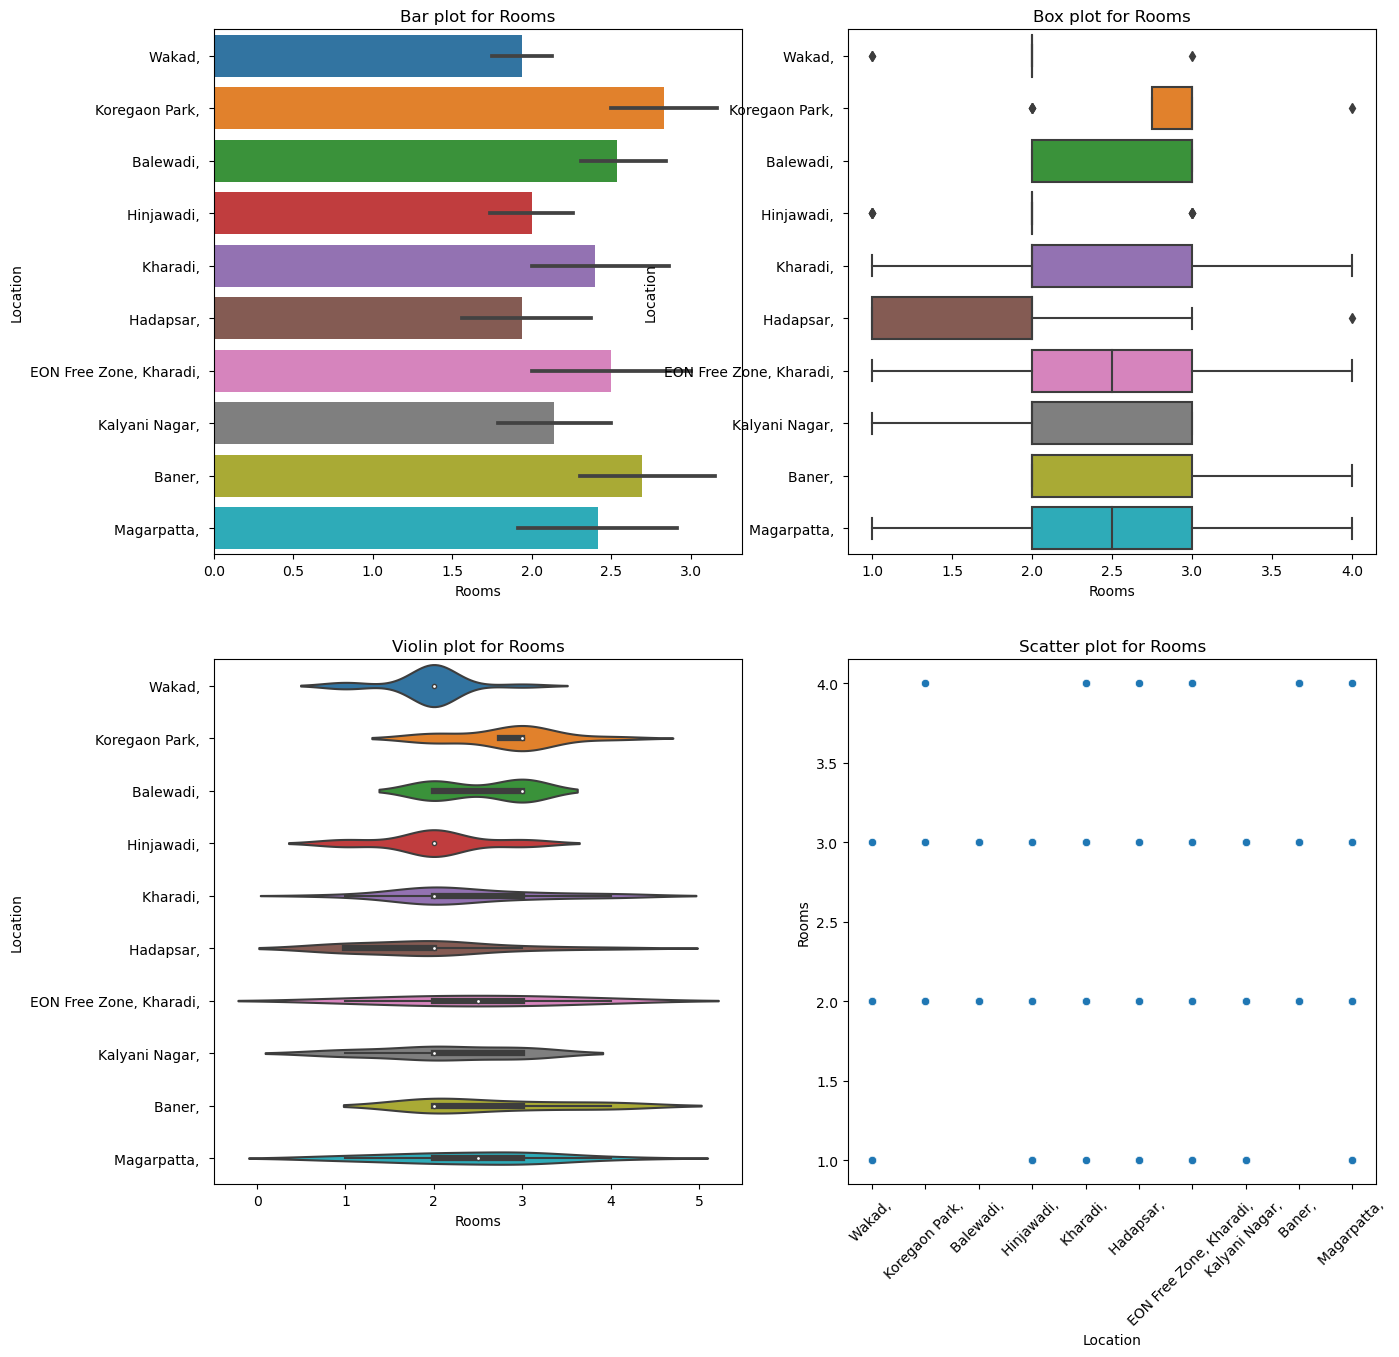

Group statistics for Bathroom:
                              mean  median  min  max
Location                                            
Balewadi,                 2.307692     2.0    2    3
Baner,                    2.769231     2.0    2    5
EON Free Zone, Kharadi,   2.666667     2.5    1    5
Hadapsar,                 2.000000     2.0    1    4
Hinjawadi,                1.913043     2.0    1    3
Kalyani Nagar,            2.214286     2.0    1    4
Kharadi,                  2.533333     2.0    1    6
Koregaon Park,            3.083333     3.0    2    6
Magarpatta,               2.416667     2.5    1    4
Wakad,                    2.000000     2.0    1    3



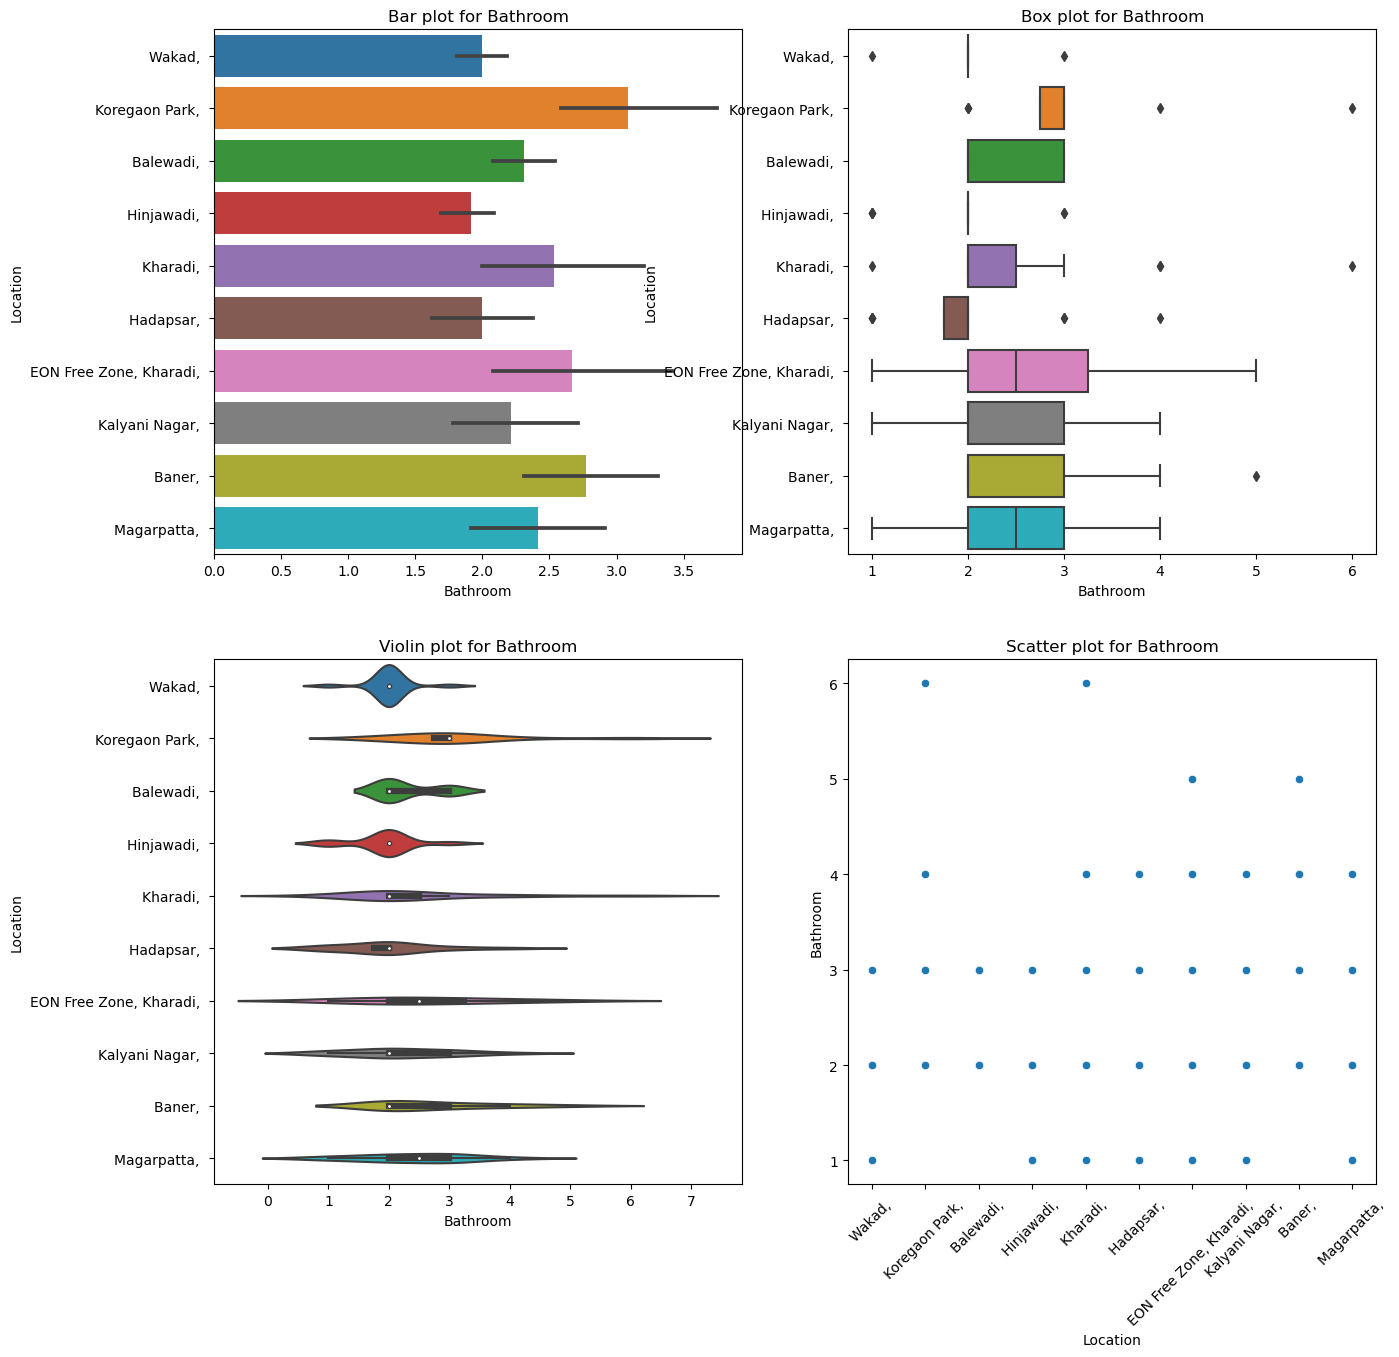

Group statistics for Carpet Area:
                                 mean  median    min     max
Location                                                    
Balewadi,                 1150.230769  1100.0  785.0  1560.0
Baner,                    1368.769231   900.0  610.0  3399.0
EON Free Zone, Kharadi,   1524.500000  1255.0  447.0  3800.0
Hadapsar,                 1035.687500   832.5  450.0  3500.0
Hinjawadi,                 732.086957   730.0  400.0  1100.0
Kalyani Nagar,             872.357143   825.0  480.0  1400.0
Kharadi,                  1185.933333   825.0  500.0  3500.0
Koregaon Park,            1345.833333  1300.0  800.0  3000.0
Magarpatta,                972.666667   825.0  460.0  1650.0
Wakad,                     810.312500   825.0  500.0  1278.0



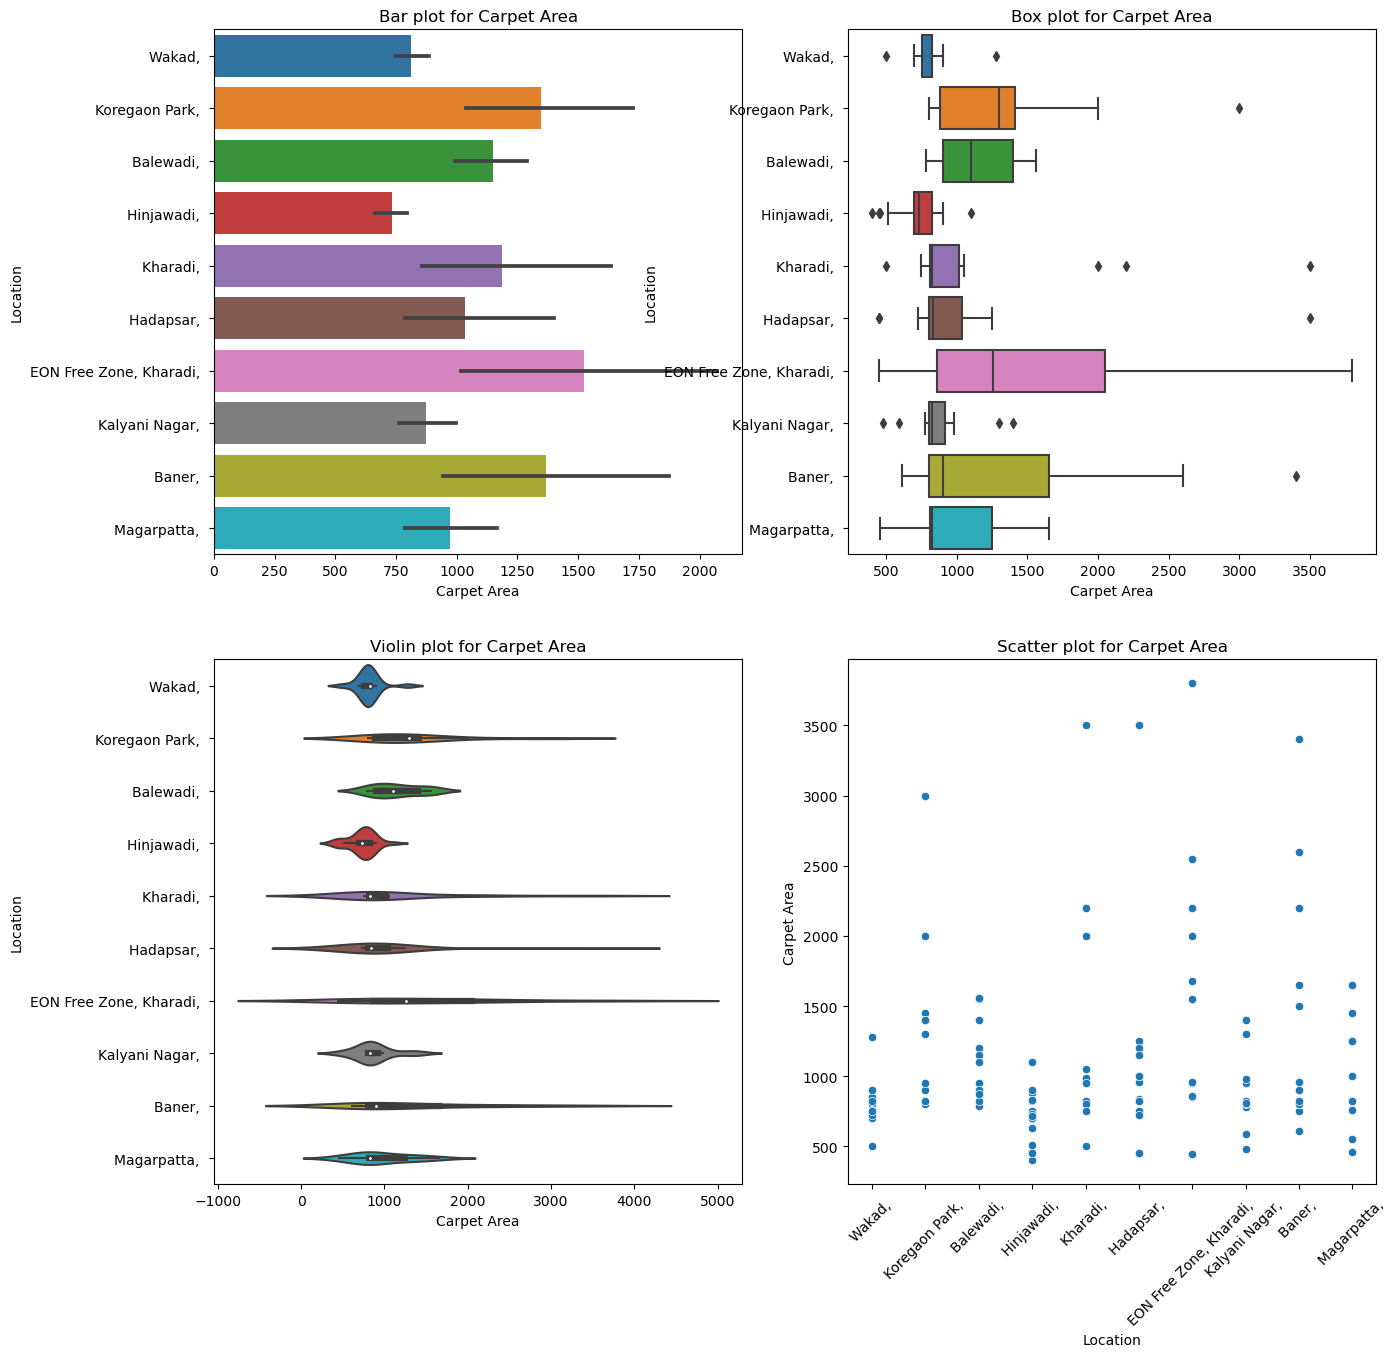

Group statistics for Floor:
                              mean  median  min  max
Location                                            
Balewadi,                 8.307692     9.0    1   13
Baner,                    6.692308     6.0    2   15
EON Free Zone, Kharadi,   6.750000     7.0    2   10
Hadapsar,                 4.937500     4.0    1   12
Hinjawadi,                8.652174     9.0    2   22
Kalyani Nagar,            4.785714     4.5    2    8
Kharadi,                  7.466667     5.0    2   20
Koregaon Park,            4.583333     4.5    0   12
Magarpatta,               5.083333     5.0    3   10
Wakad,                    8.000000     6.5    2   19



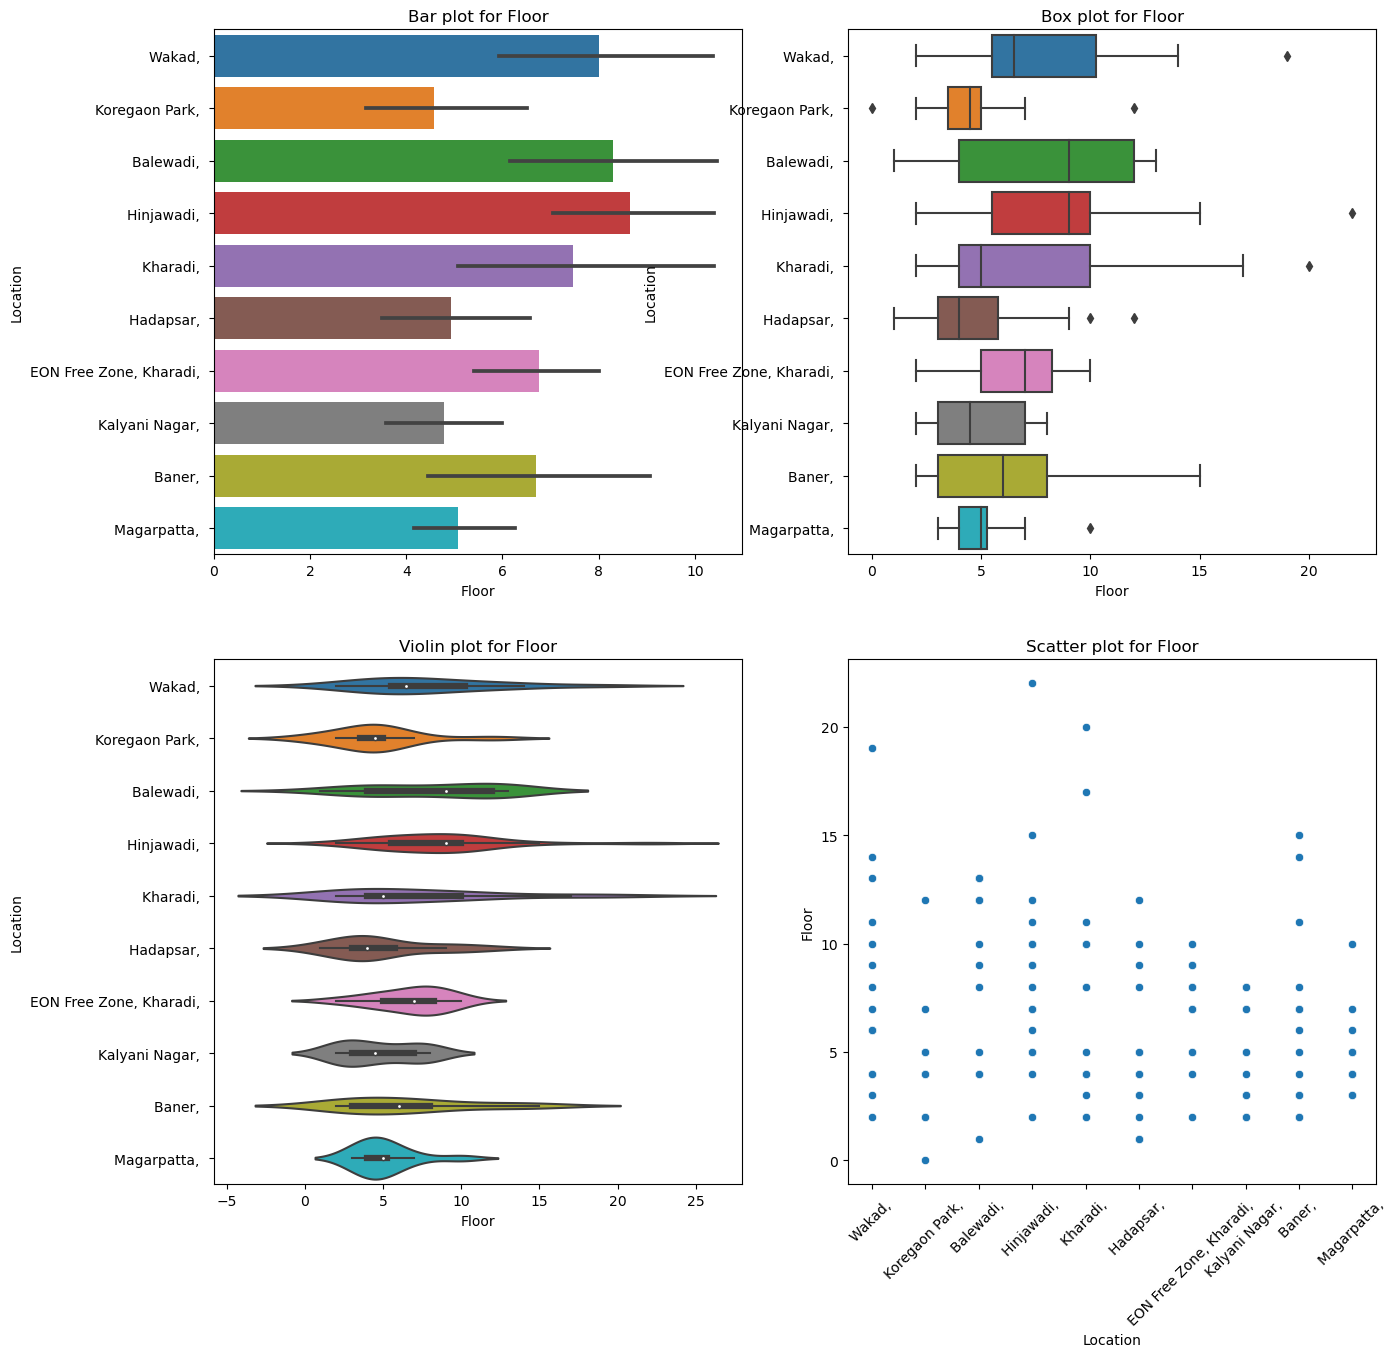

Group statistics for Price:
                                  mean   median      min       max
Location                                                          
Balewadi,                 47115.307692  42000.0  31999.0   75000.0
Baner,                    78000.000000  37000.0  24000.0  410000.0
EON Free Zone, Kharadi,   57083.333333  50000.0  15000.0  120000.0
Hadapsar,                 33137.500000  30500.0   7000.0  100000.0
Hinjawadi,                24200.000000  23000.0   7800.0   42000.0
Kalyani Nagar,            51357.142857  39000.0  10000.0  140000.0
Kharadi,                  65766.666667  43000.0  23500.0  250000.0
Koregaon Park,            85583.333333  62500.0  35000.0  330000.0
Magarpatta,               47833.333333  41000.0  25000.0  150000.0
Wakad,                    28687.500000  27500.0  21000.0   37000.0



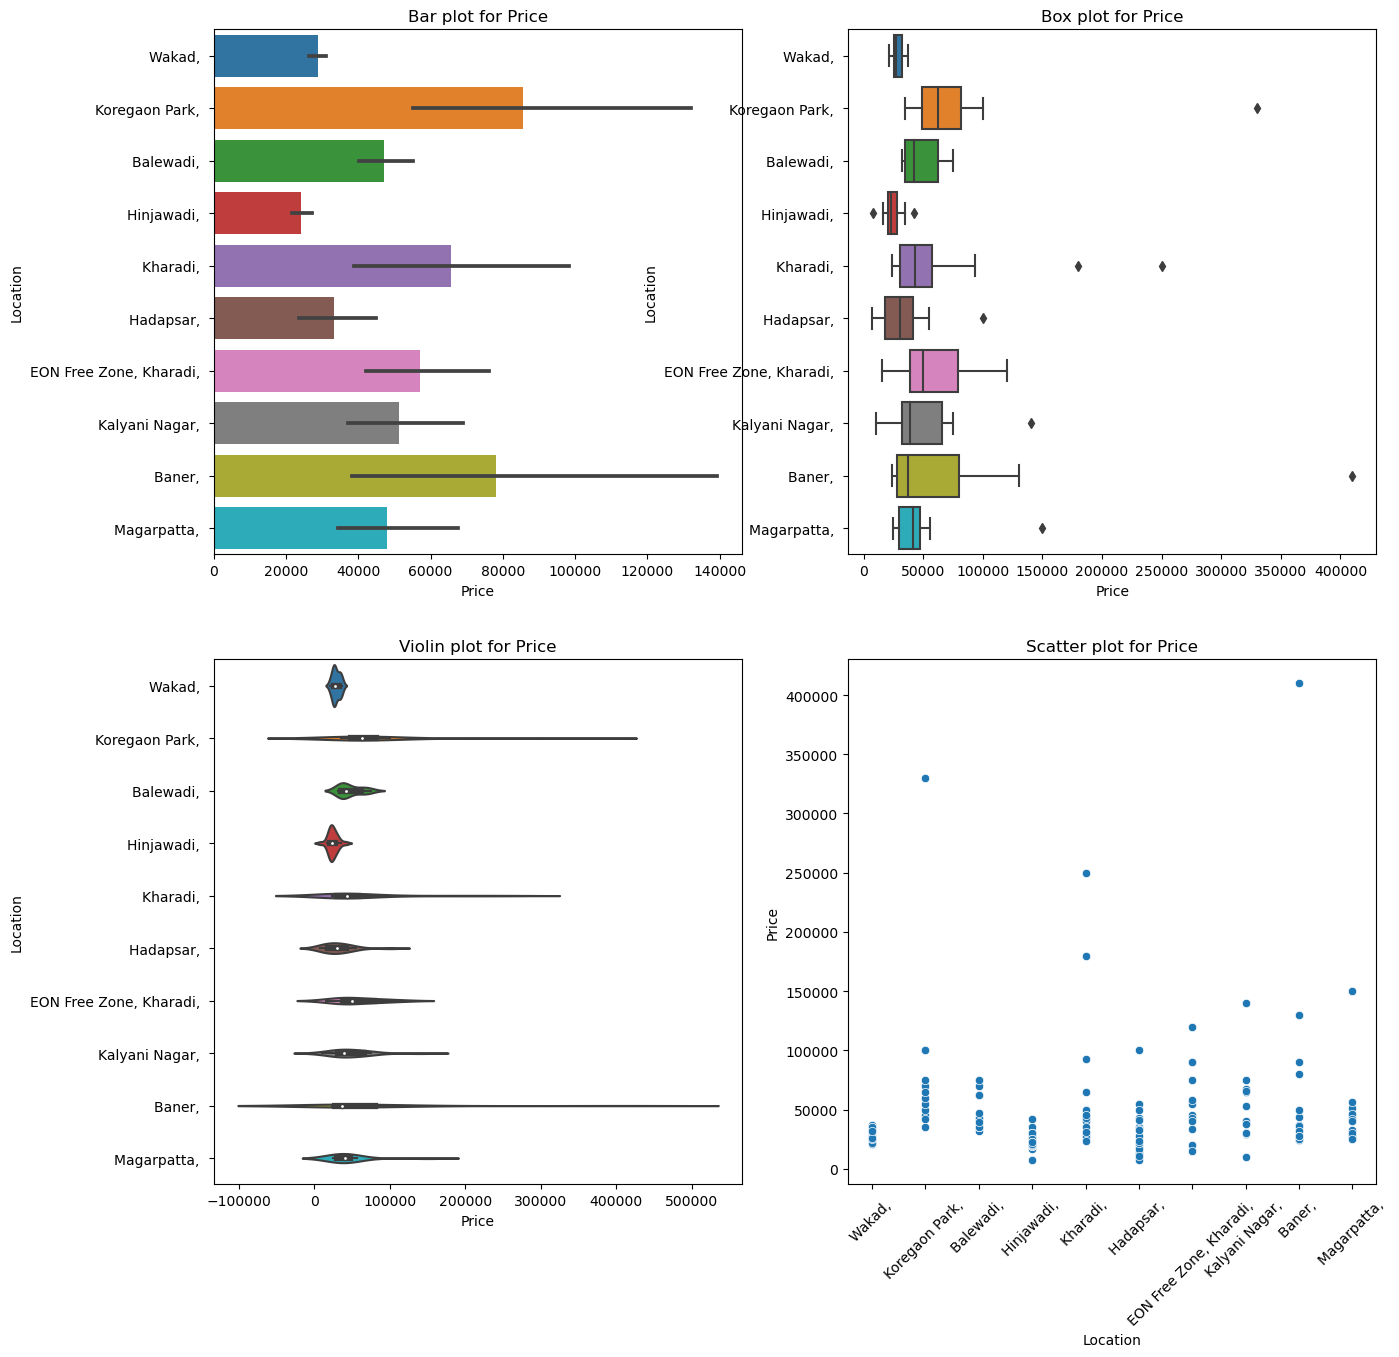

In [45]:
cat_num(Data1,'Location',numerical_columns)

In [46]:
######### num v/s num #########

In [47]:
def replace_outliers_with_median(df, column):
    # IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()  # calculate median
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    return df

def num_num(df, col1, col2, adjust_outliers_with_median=True, save_plots=True, save_path=''):
    if adjust_outliers_with_median:
        df = replace_outliers_with_median(df, col1)
        df = replace_outliers_with_median(df, col2)

    plt.figure(figsize=(15, 15))
    
    # Scatter plot
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(f'Scatter plot between {col1} and {col2}')
    if save_plots:
        plt.savefig(f'{save_path}scatter_{col1}_{col2}.png')  # Save scatter plot
    print()

    # Line plot
    plt.subplot(2, 2, 2)
    sns.lineplot(data=df, x=col1, y=col2)
    plt.title(f'Line plot between {col1} and {col2}')
    if save_plots:
        plt.savefig(f'{save_path}line_{col1}_{col2}.png')  # Save line plot
    print()

    # Joint plot
    sns.jointplot(data=df, y=col1, x=col2, kind="hist")
    plt.title(f'Joint plot between {col1} and {col2}')
    if save_plots:
        plt.savefig(f'{save_path}joint_{col1}_{col2}.png')  # Save joint plot
    print()
    plt.show()


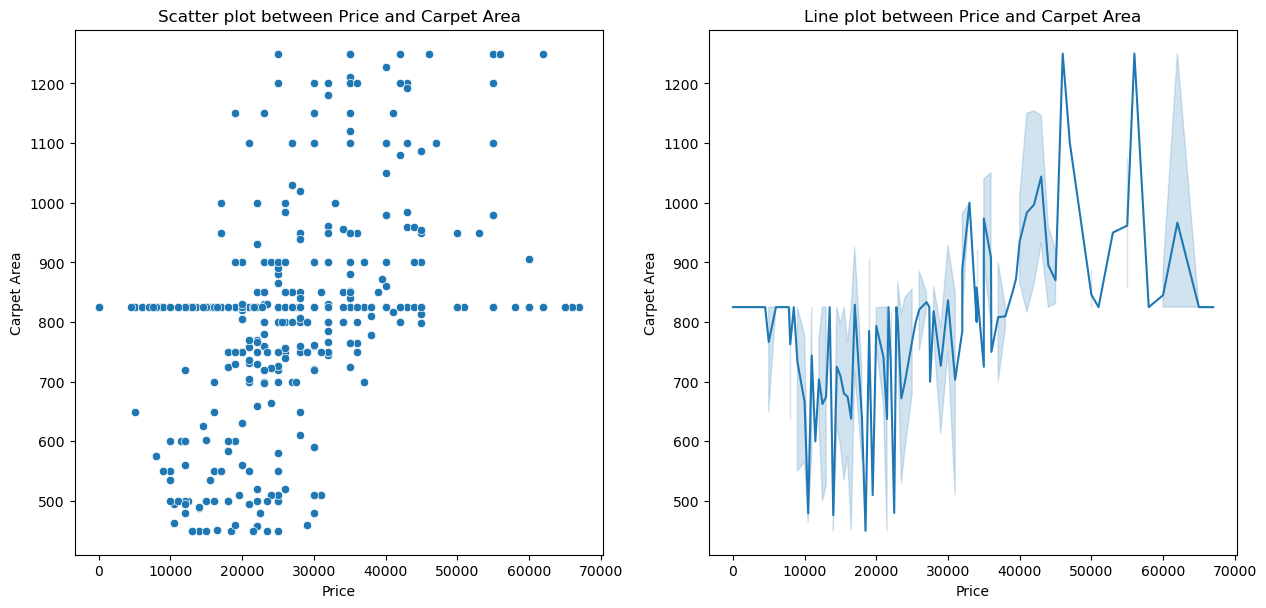

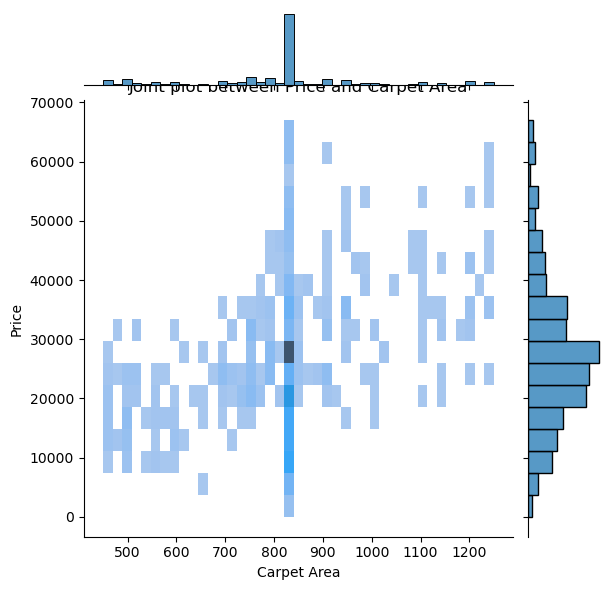

In [48]:
num_num(Data1,'Price','Carpet Area')

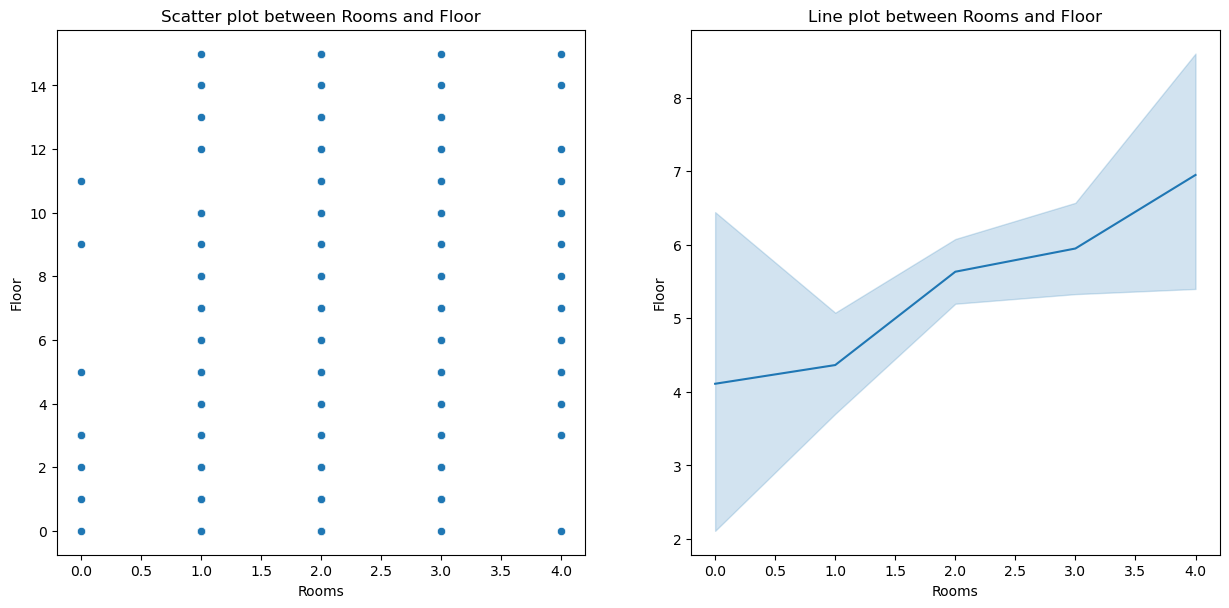

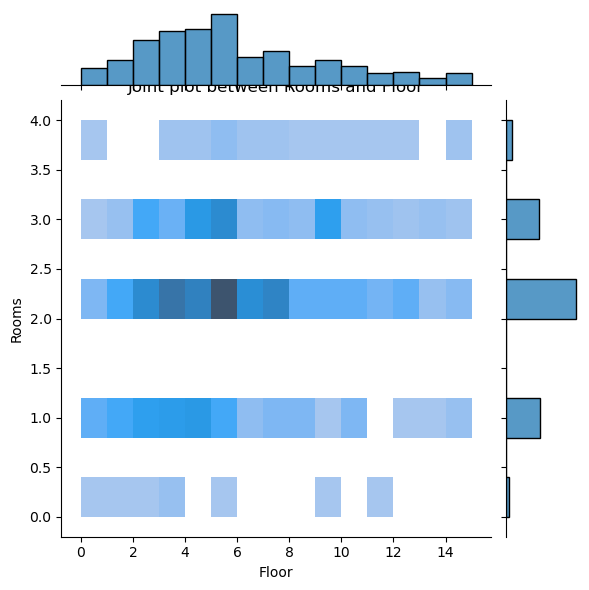

In [49]:
num_num(Data1,'Rooms','Floor')

In [50]:
## cat v/s cat

In [51]:
def cat_n_cat(data, column1, column2, head=10): ## head to get the most frqeuent cat
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(data[column1], data[column2])
    
    top_values = contingency_table.sum(axis=1).nlargest(head).index
    contingency_table = contingency_table.loc[top_values]
    
    contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100 # Convert contingency table to percentages
    print(contingency_table_percent)
    plt.figure(figsize=(15, 6))
    
    # Bar plot 
    plt.subplot(1, 2, 1)
    sns.barplot(data=contingency_table_percent.T, orient='h')
    plt.xlabel('Percentage')
    plt.ylabel(f'{column1}')
    plt.title(f'Top {head} Categories in {column1} vs {column2}')
    
    # Heatmap of the percentages
    plt.subplot(1, 2, 2)
    sns.heatmap(contingency_table_percent, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Percentage'})
    plt.xlabel(f'{column2}')
    plt.ylabel(f'{column1}')
    plt.title(f'Heatmap of {column1} vs {column2}')
    plt.show()


Location                 Adarsh Colony Tingre Nagar,   Akurdi,   \
Availability                                                      
Immediately    1.826484                           0.0  0.456621   
From Mar '25  11.111111                           0.0  0.000000   
From Apr '25   0.000000                          50.0  0.000000   

Location      Amanora Park Town,   Ambegaon BK,   Ambegaon,    Aundh,   \
Availability                                                             
Immediately              1.598174       0.456621    0.684932  1.598174   
From Mar '25             0.000000       0.000000    0.000000  0.000000   
From Apr '25             0.000000       0.000000    0.000000  0.000000   

Location      Balewadi Phata, Baner,   Balewadi,   \
Availability                                        
Immediately                  0.228311    2.968037   
From Mar '25                 0.000000    0.000000   
From Apr '25                 0.000000    0.000000   

Location      Balkrishna Sa

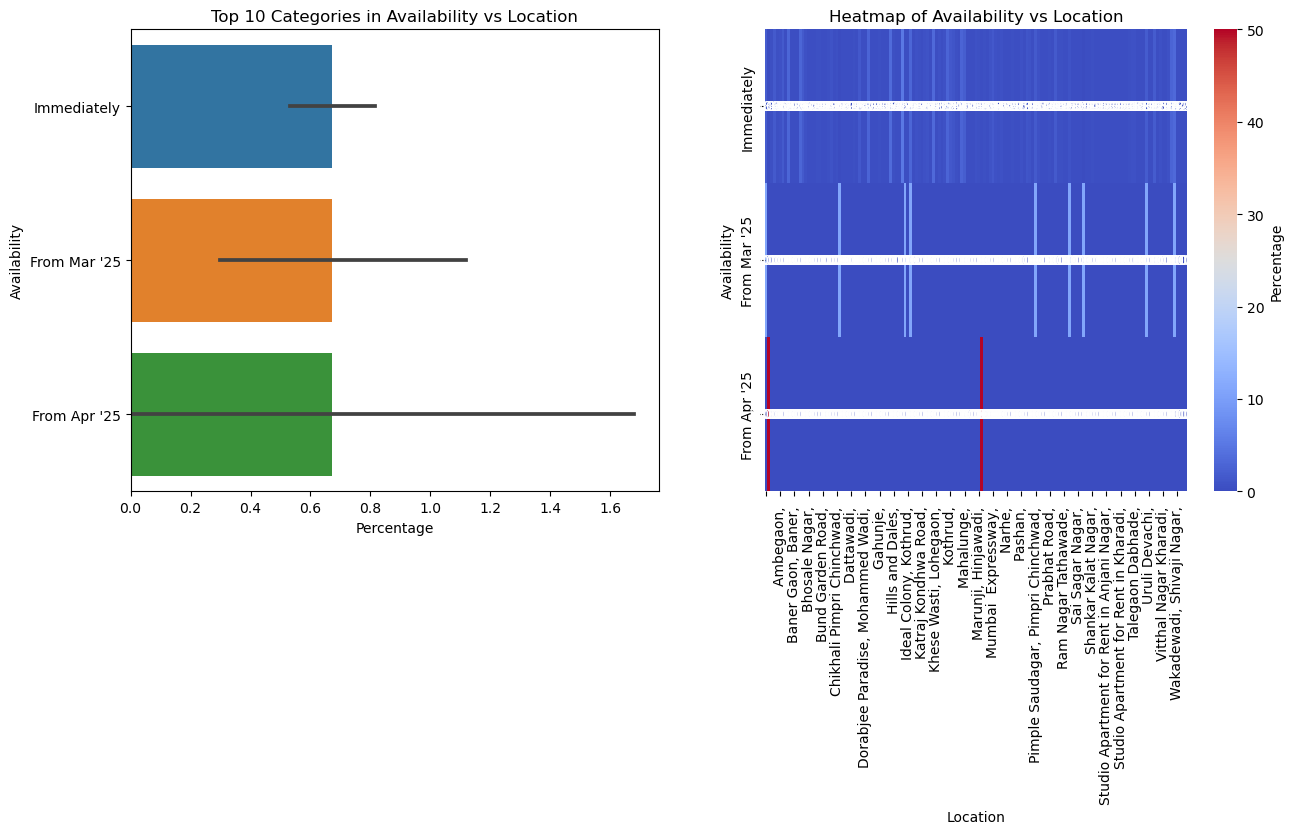

In [52]:
cat_n_cat(Data1,'Availability','Location')

Location                  Adarsh Colony Tingre Nagar,   Akurdi,   \
Furnishing                                                         
Unfurnished     2.450980                      0.000000  0.490196   
Semi-Furnished  1.398601                      0.000000  0.699301   
Furnished       1.960784                      0.980392  0.000000   

Location        Amanora Park Town,   Ambegaon BK,   Ambegaon,    Aundh,   \
Furnishing                                                                 
Unfurnished                1.960784       0.980392    0.490196  0.000000   
Semi-Furnished             1.398601       0.000000    0.699301  2.097902   
Furnished                  0.980392       0.000000    0.980392  3.921569   

Location        Balewadi Phata, Baner,   Balewadi,   \
Furnishing                                            
Unfurnished                    0.490196    4.411765   
Semi-Furnished                 0.000000    2.097902   
Furnished                      0.000000    0.980392   

Lo

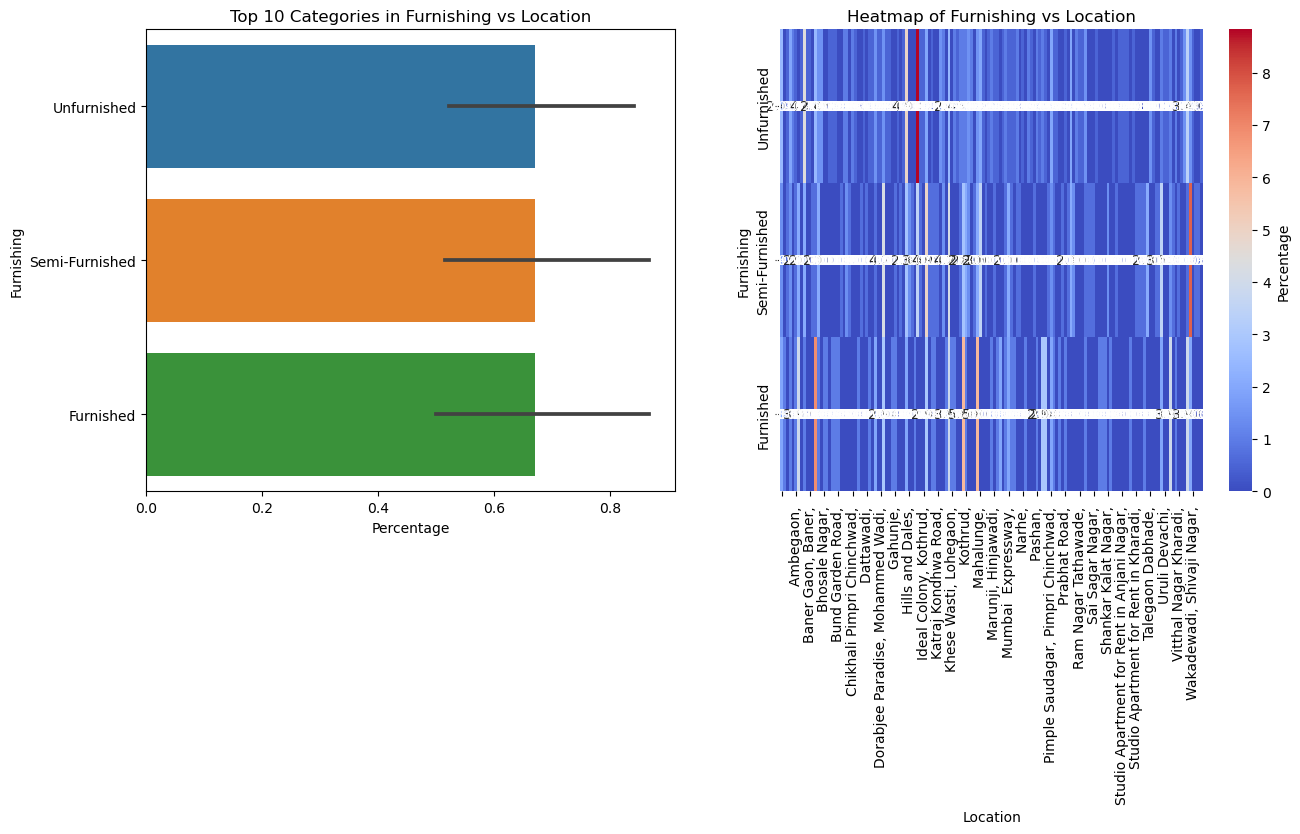

In [53]:
cat_n_cat(Data1,'Furnishing','Location')